In [1]:
import re
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt


In [430]:
# File path for the original data HEALTH DATA 
file_path = "C:/Users/Umutk/Desktop/DSA210 data/export_health.txt"  # Corrected file path

dates = []
step_counts = []

# Read the original file line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Filter only "HKQuantityTypeIdentifierStepCount" records
        if 'HKQuantityTypeIdentifierStepCount' in line:
            # Extract startDate and step count value using regex
            match = re.search(r'startDate="([\d-]+\s[\d:]+).*?value="(\d+)"', line)
            if match:
                date_str = match.group(1)  # Extract startDate
                step_count = int(match.group(2))  # Extract step count
                
                # Convert date string to datetime object
                date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
                
                dates.append(date)
                step_counts.append(step_count)

# Create a DataFrame with extracted data
df = pd.DataFrame({'date': dates, 'step_count': step_counts})

# Add a new column with only the date (without time) for grouping
df['update_date'] = df['date'].dt.strftime('%Y-%m-%d')

# Create a new DataFrame with unique dates and the sum of step counts for each day
df_sum_step = df.groupby('update_date')['step_count'].sum().reset_index()

# Create a date range from the earliest to the latest date in the dataset
date_range = pd.date_range(start='2022-11-29', end='2024-11-29', freq='D')
df_all_dates = pd.DataFrame({'date': date_range})

# Convert 'update_date' to datetime for merging
df_sum_step['update_date'] = pd.to_datetime(df_sum_step['update_date'])

# Merge the two DataFrames to ensure all dates are included
df_filled = pd.merge(df_all_dates, df_sum_step, left_on='date', right_on='update_date', how='left')

# Fill missing step counts with zero
df_filled['step_count'] = df_filled['step_count'].fillna(0)

# Final DataFrame with dates and step counts
df_filled = df_filled[['date', 'step_count']]

# Display the resulting DataFrame
print("\nFilled DataFrame:")
print(df_filled)


Filled DataFrame:
          date  step_count
0   2022-11-29        9450
1   2022-11-30        8434
2   2022-12-01       10243
3   2022-12-02       19535
4   2022-12-03        4261
..         ...         ...
727 2024-11-25        6809
728 2024-11-26        7546
729 2024-11-27        5758
730 2024-11-28        5278
731 2024-11-29        5284

[732 rows x 2 columns]


In [431]:
# File path for the JSON data INSTAGRAM DATA

file_path = "C:/Users/Umutk/Desktop/DSA210 data/liked_posts.json"  # Corrected file path

# Load the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract relevant data
likes_data = data.get("likes_media_likes", [])
dates = []

for like in likes_data:
    for item in like["string_list_data"]:
        timestamp = item.get("timestamp", None)
        if timestamp:
            # Convert timestamp to datetime and extract the date
            date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
            dates.append(date)

# Create a DataFrame for aggregation
df = pd.DataFrame({'date': dates})

# Filter data between 2022-11-29 and 2024-11-29
start_date = '2022-11-29'
end_date = '2024-11-29'
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Count the total likes for each date
df_summary = df_filtered.value_counts().reset_index(name="total_likes")
df_summary.columns = ['date', 'total_likes']

# Sort by date
df_summary = df_summary.sort_values(by='date').reset_index(drop=True)

# Display the DataFrame
print("\nLikes Summary by Date:")
print(df_summary)


Likes Summary by Date:
          date  total_likes
0   2022-11-29            1
1   2022-11-30            3
2   2022-12-01            2
3   2022-12-03            2
4   2022-12-04            5
..         ...          ...
716 2024-11-25            2
717 2024-11-26            1
718 2024-11-27            1
719 2024-11-28            3
720 2024-11-29            1

[721 rows x 2 columns]


In [432]:

# TİKTOK DATA 

file_path = "C:/Users/Umutk/Desktop/DSA210 data/Like List_Tiktok.txt"  # Update with the correct file path

# Lists to store extracted data
dates = []

# Read the TikTok likes file line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Extract date using regex
        match = re.search(r'Date:\s([\d-]+\s[\d:]+)', line)
        if match:
            date_str = match.group(1)
            # Convert date string to datetime object and extract the date
            date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S').date()
            dates.append(date)

# Create a DataFrame for aggregation
df = pd.DataFrame({'date': dates})

# Count the total likes for each date
df_tiktok = df.groupby('date').size().reset_index(name='total_likes')

# Sort by date
df_tiktok = df_tiktok.sort_values(by='date').reset_index(drop=True)

# Display the DataFrame
print("\nTikTok Likes Summary by Date:")
print(df_tiktok)




TikTok Likes Summary by Date:
           date  total_likes
0    2023-07-28           13
1    2023-07-29           27
2    2023-07-30           24
3    2023-07-31           23
4    2023-08-01           23
..          ...          ...
426  2024-11-15            2
427  2024-11-17            1
428  2024-11-18            3
429  2024-11-21            5
430  2024-11-23            1

[431 rows x 2 columns]


In [433]:
#MERGE WITH INSTAGRAM AND TIKTOK

# Filter rows where both Instagram Likes and TikTok Likes are greater than 0
df_filtered_common = df_merged_likes[
    (df_merged_likes['Instagram Likes'] > 0) & (df_merged_likes['TikTok Likes'] > 0)
]

# Reset index for the filtered DataFrame
df_filtered_common = df_filtered_common.reset_index(drop=True)

# Display the filtered DataFrame
print("\nFiltered DataFrame with Common Dates (Instagram Likes and TikTok Likes > 0):")
print(df_filtered_common)



Filtered DataFrame with Common Dates (Instagram Likes and TikTok Likes > 0):
          date  Instagram Likes  TikTok Likes month
0   2023-07-28               15            13   Jul
1   2023-07-29               25            27   Jul
2   2023-07-30               30            24   Jul
3   2023-07-31               16            23   Jul
4   2023-08-01               11            23   Aug
..         ...              ...           ...   ...
421 2024-11-15                5             2   Nov
422 2024-11-17                4             1   Nov
423 2024-11-18                2             3   Nov
424 2024-11-21                8             5   Nov
425 2024-11-23                3             1   Nov

[426 rows x 4 columns]


In [434]:
# Ensure 'date' column in both DataFrames is in datetime format
df_summary['date'] = pd.to_datetime(df_summary['date'])
df_tiktok['date'] = pd.to_datetime(df_tiktok['date'])

# Merge Instagram and TikTok likes data
df_merged_likes = pd.merge(
    df_summary, 
    df_tiktok, 
    on='date', 
    how='inner', 
    suffixes=('_Instagram', '_TikTok')
)

# Rename columns for clarity
df_merged_likes.rename(columns={'total_likes_Instagram': 'Instagram Likes', 'total_likes_TikTok': 'TikTok Likes'}, inplace=True)

# Filter rows where both Instagram Likes and TikTok Likes are greater than 0
df_filtered_common = df_merged_likes[
    (df_merged_likes['Instagram Likes'] > 0) & (df_merged_likes['TikTok Likes'] > 0)
]

# Reset index for the filtered DataFrame
df_filtered_common = df_filtered_common.reset_index(drop=True)

# Display the filtered DataFrame
print("\nFiltered DataFrame with Common Dates (Instagram Likes and TikTok Likes > 0):")
print(df_filtered_common)



Filtered DataFrame with Common Dates (Instagram Likes and TikTok Likes > 0):
          date  Instagram Likes  TikTok Likes
0   2023-07-28               15            13
1   2023-07-29               25            27
2   2023-07-30               30            24
3   2023-07-31               16            23
4   2023-08-01               11            23
..         ...              ...           ...
421 2024-11-15                5             2
422 2024-11-17                4             1
423 2024-11-18                2             3
424 2024-11-21                8             5
425 2024-11-23                3             1

[426 rows x 3 columns]


In [435]:
#MERGİNG HEALTH WITH INSTAGRAM 

# Ensure both DataFrames have a common date column
df_filled['date'] = pd.to_datetime(df_filled['date'])  # Step counts DataFrame
df_summary['date'] = pd.to_datetime(df_summary['date'])  # Instagram likes DataFrame

# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(df_filled, df_summary, on='date', how='outer', suffixes=('_steps', '_likes'))

# Fill missing values with zero for step counts and likes
merged_df['step_count'] = merged_df['step_count'].fillna(0).astype(int)
merged_df['total_likes'] = merged_df['total_likes'].fillna(0).astype(int)

# Rename columns for clarity
merged_df.rename(columns={'step_count': 'Step Counts', 'total_likes': 'Instagram Likes'}, inplace=True)

# Sort by date
merged_df = merged_df.sort_values(by='date').reset_index(drop=True)

# Display the final merged DataFrame
print("\nMerged DataFrame (Steps and Instagram Likes):")
print(merged_df)

# Display a sample of the merged DataFrame
merged_df.head()



Merged DataFrame (Steps and Instagram Likes):
          date  Step Counts  Instagram Likes
0   2022-11-29         9450                1
1   2022-11-30         8434                3
2   2022-12-01        10243                2
3   2022-12-02        19535                0
4   2022-12-03         4261                2
..         ...          ...              ...
727 2024-11-25         6809                2
728 2024-11-26         7546                1
729 2024-11-27         5758                1
730 2024-11-28         5278                3
731 2024-11-29         5284                1

[732 rows x 3 columns]


date  Step Counts  Instagram Likes
0 2022-11-29         9450                1
1 2022-11-30         8434                3
2 2022-12-01        10243                2
3 2022-12-02        19535                0
4 2022-12-03         4261                2

In [436]:

# MERGING TIKTOK WITH HEALTH

# Ensure both DataFrames have the same date column format
df_filled['date'] = pd.to_datetime(df_filled['date'])  # Step counts DataFrame
df_tiktok['date'] = pd.to_datetime(df_tiktok['date'])  # TikTok likes DataFrame

# Merge Step Counts and TikTok Likes with only common dates
df_common_dates = pd.merge(df_filled, df_tiktok, on='date', how='inner')

# Rename columns for clarity
df_common_dates.rename(columns={'step_count': 'Step Counts', 'total_likes': 'TikTok Likes'}, inplace=True)

# Sort by date
df_common_dates = df_common_dates.sort_values(by='date').reset_index(drop=True)

# Display the merged DataFrame with common dates
print("\nMerged DataFrame (Common Dates for Step Counts and TikTok Likes):")
print(df_common_dates)
df_tiktok_health = df_common_dates.copy()


Merged DataFrame (Common Dates for Step Counts and TikTok Likes):
          date  Step Counts  TikTok Likes
0   2023-07-28        10654            13
1   2023-07-29         5065            27
2   2023-07-30         4853            24
3   2023-07-31        11033            23
4   2023-08-01         4785            23
..         ...          ...           ...
426 2024-11-15        12631             2
427 2024-11-17        15028             1
428 2024-11-18         8572             3
429 2024-11-21         5583             5
430 2024-11-23         4513             1

[431 rows x 3 columns]


In [437]:
# Ensure all DataFrames have a common date column format
df_filled['date'] = pd.to_datetime(df_filled['date'])  # Step counts DataFrame
df_summary['date'] = pd.to_datetime(df_summary['date'])  # Instagram likes DataFrame
df_tiktok['date'] = pd.to_datetime(df_tiktok['date'])  # TikTok likes DataFrame

# Determine the common date range from TikTok data
common_start_date = df_tiktok['date'].min()
common_end_date = df_tiktok['date'].max()

# Limit Step Counts and Instagram Likes to the TikTok date range
df_filled_limited = df_filled[(df_filled['date'] >= common_start_date) & (df_filled['date'] <= common_end_date)].copy()
df_summary_limited = df_summary[(df_summary['date'] >= common_start_date) & (df_summary['date'] <= common_end_date)].copy()

# Rename columns for clarity before merging
df_summary_limited.rename(columns={'total_likes': 'Instagram Likes'}, inplace=True)
df_tiktok.rename(columns={'total_likes': 'TikTok Likes'}, inplace=True)

# Merge Step Counts, Instagram Likes, and TikTok Likes on the 'date' column
df_merged_limited = pd.merge(df_filled_limited, df_summary_limited, on='date', how='outer')
df_merged_limited = pd.merge(df_merged_limited, df_tiktok, on='date', how='outer')

# Fill missing values with zero for all metrics
df_merged_limited['step_count'] = df_merged_limited['step_count'].fillna(0).astype(int)
df_merged_limited['Instagram Likes'] = df_merged_limited['Instagram Likes'].fillna(0).astype(int)
df_merged_limited['TikTok Likes'] = df_merged_limited['TikTok Likes'].fillna(0).astype(int)

# Rename step count column for consistency
df_merged_limited.rename(columns={'step_count': 'Step Counts'}, inplace=True)

# Sort the DataFrame by date
df_merged_limited = df_merged_limited.sort_values(by='date').reset_index(drop=True)

# Display the final merged DataFrame
print("\nMerged DataFrame (Step Counts, Instagram Likes, and TikTok Likes) within TikTok Date Range:")
print(df_merged_limited)


Merged DataFrame (Step Counts, Instagram Likes, and TikTok Likes) within TikTok Date Range:
          date  Step Counts  Instagram Likes  TikTok Likes
0   2023-07-28        10654               15            13
1   2023-07-29         5065               25            27
2   2023-07-30         4853               30            24
3   2023-07-31        11033               16            23
4   2023-08-01         4785               11            23
..         ...          ...              ...           ...
480 2024-11-19         4283                7             0
481 2024-11-20         5063                0             0
482 2024-11-21         5583                8             5
483 2024-11-22         6284                2             0
484 2024-11-23         4513                3             1

[485 rows x 4 columns]


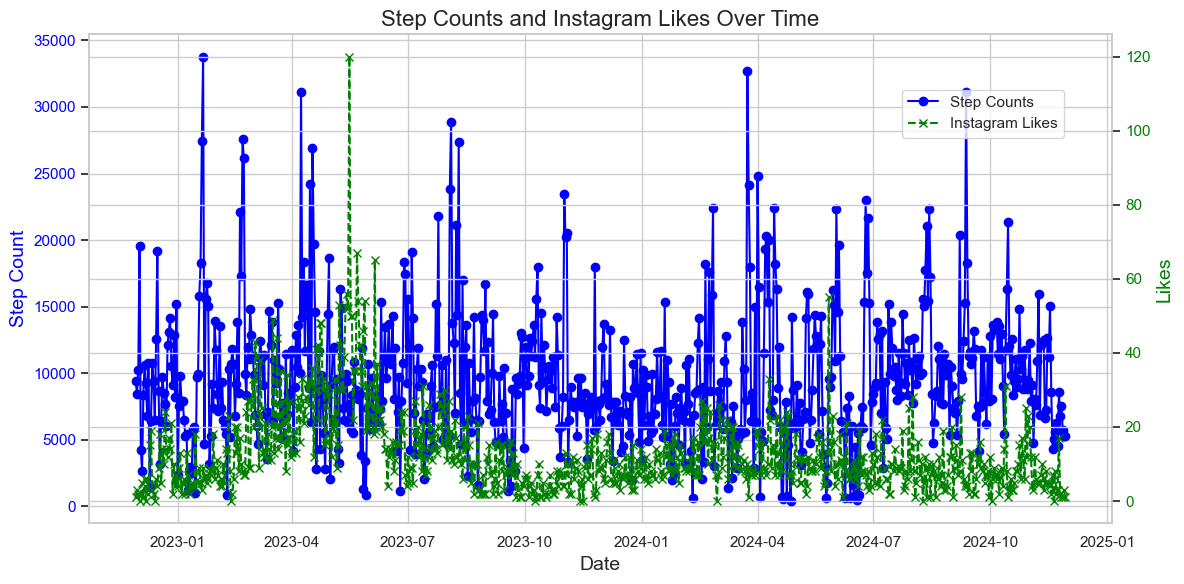

In [438]:


# Ensure both DataFrames have a common date column
df_filled['date'] = pd.to_datetime(df_filled['date'])  # Step counts DataFrame
df_summary['date'] = pd.to_datetime(df_summary['date'])  # Instagram likes DataFrame

# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(df_filled, df_summary, on='date', how='outer')  # Ensure all dates are included

# Fill missing values with zero
merged_df['Step Counts'] = merged_df['step_count'].fillna(0).astype(int)
merged_df['Instagram Likes'] = merged_df['total_likes'].fillna(0).astype(int)

# Sort the merged DataFrame by date
merged_df = merged_df.sort_values(by='date').reset_index(drop=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Step Counts on the first y-axis
ax1.plot(merged_df['date'], merged_df['Step Counts'], label='Step Counts', color='blue', marker='o')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Step Count', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Instagram Likes
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['Instagram Likes'], label='Instagram Likes', color='green', marker='x', linestyle='--')
ax2.set_ylabel('Likes', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Step Counts and Instagram Likes Over Time', fontsize=16)
ax1.grid(True)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.85))

# Show the plot
plt.show()



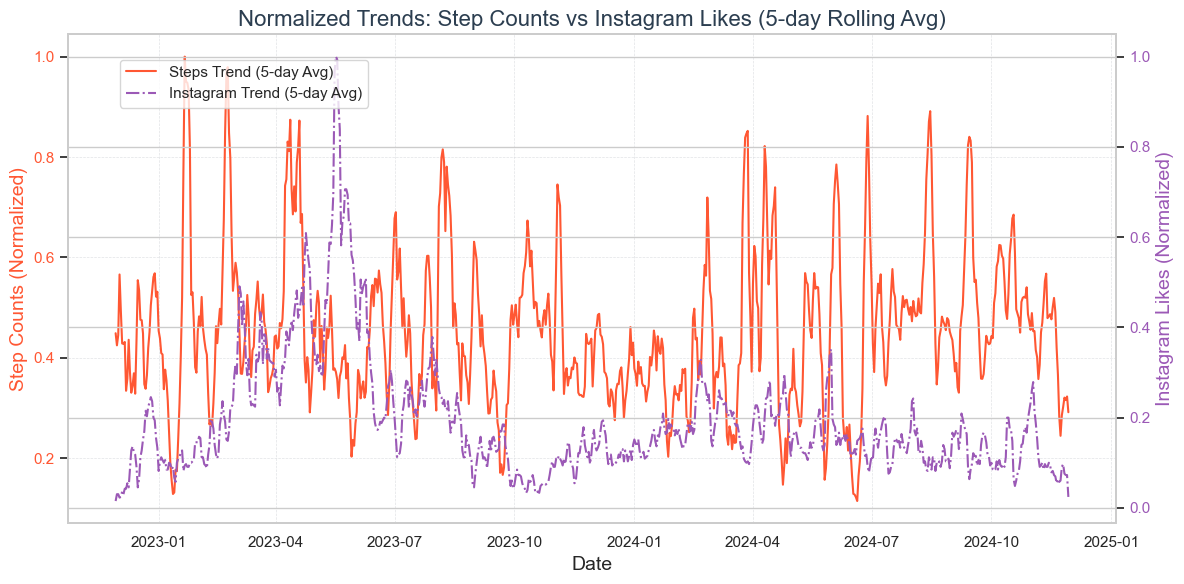

In [439]:
# Use the merged DataFrame for step counts and Instagram likes
df_common_dates = merged_df.copy()  # Use merged_df directly

# Apply a 5-day rolling average to smooth the data
df_common_dates['Step Counts (Smoothed)'] = df_common_dates['Step Counts'].rolling(window=5, min_periods=1).mean()
df_common_dates['Instagram Likes (Smoothed)'] = df_common_dates['Instagram Likes'].rolling(window=5, min_periods=1).mean()

# Normalize the smoothed values for better comparison on the same graph
df_common_dates['Step Counts (Normalized)'] = df_common_dates['Step Counts (Smoothed)'] / df_common_dates['Step Counts (Smoothed)'].max()
df_common_dates['Instagram Likes (Normalized)'] = df_common_dates['Instagram Likes (Smoothed)'] / df_common_dates['Instagram Likes (Smoothed)'].max()

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot normalized step counts
ax1.plot(df_common_dates['date'], df_common_dates['Step Counts (Normalized)'], label='Steps Trend (5-day Avg)', color='#FF5733')  # Orange tone
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Step Counts (Normalized)', color='#FF5733', fontsize=14)  # Orange y-axis
ax1.tick_params(axis='y', labelcolor='#FF5733')

# Create a second y-axis for Instagram Likes
ax2 = ax1.twinx()
ax2.plot(df_common_dates['date'], df_common_dates['Instagram Likes (Normalized)'], label='Instagram Trend (5-day Avg)', color='#9B59B6', linestyle='-.')  # Purple tone
ax2.set_ylabel('Instagram Likes (Normalized)', color='#9B59B6', fontsize=14)  # Purple y-axis
ax2.tick_params(axis='y', labelcolor='#9B59B6')

# Add a title
plt.title('Normalized Trends: Step Counts vs Instagram Likes (5-day Rolling Avg)', fontsize=16, color='#2C3E50')  # Dark gray title

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Add grid for clarity
ax1.grid(color='#D5D8DC', linestyle='--', linewidth=0.5, alpha=0.7)  # Light gray grid

# Show the plot
plt.show()


In [440]:
print(df_tiktok_health)


          date  Step Counts  TikTok Likes
0   2023-07-28        10654            13
1   2023-07-29         5065            27
2   2023-07-30         4853            24
3   2023-07-31        11033            23
4   2023-08-01         4785            23
..         ...          ...           ...
426 2024-11-15        12631             2
427 2024-11-17        15028             1
428 2024-11-18         8572             3
429 2024-11-21         5583             5
430 2024-11-23         4513             1

[431 rows x 3 columns]


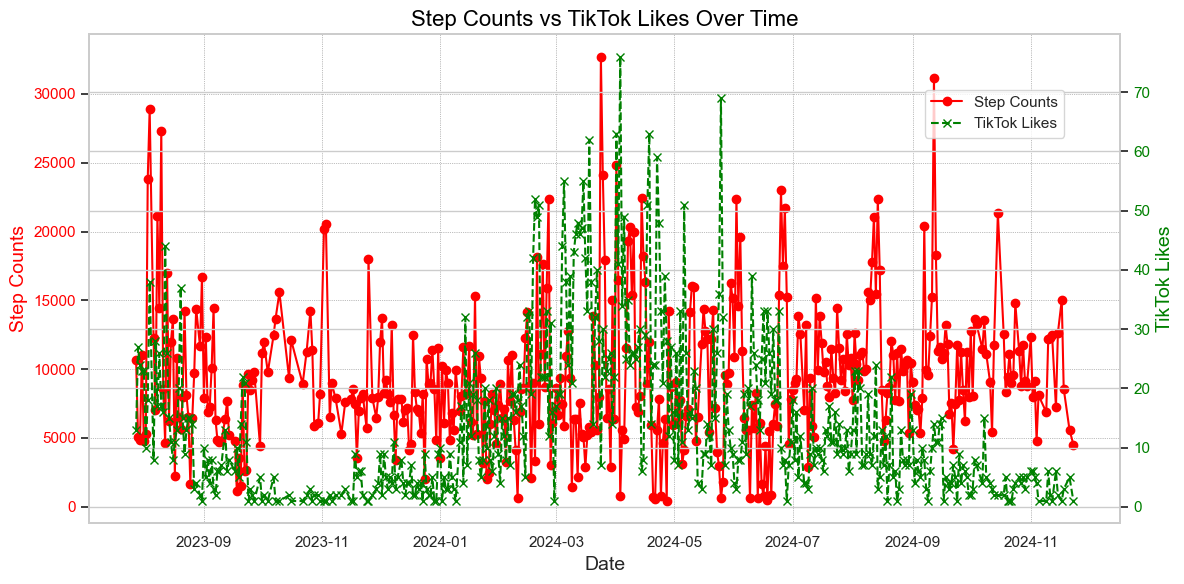

In [441]:
import matplotlib.pyplot as plt

# Plot Step Counts and TikTok Likes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Step Counts on the first y-axis
ax1.plot(
    df_tiktok_health['date'], 
    df_tiktok_health['Step Counts'], 
    label='Step Counts', 
    color='red', 
    marker='o'
)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Step Counts', color='red', fontsize=14)
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for TikTok Likes
ax2 = ax1.twinx()
ax2.plot(
    df_tiktok_health['date'], 
    df_tiktok_health['TikTok Likes'], 
    label='TikTok Likes', 
    color='green', 
    marker='x', 
    linestyle='--'
)
ax2.set_ylabel('TikTok Likes', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Step Counts vs TikTok Likes Over Time', fontsize=16, color='black')
ax1.grid(color='gray', linestyle=':', linewidth=0.5)

# Add a legend
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.85))

# Show the plot
plt.show()


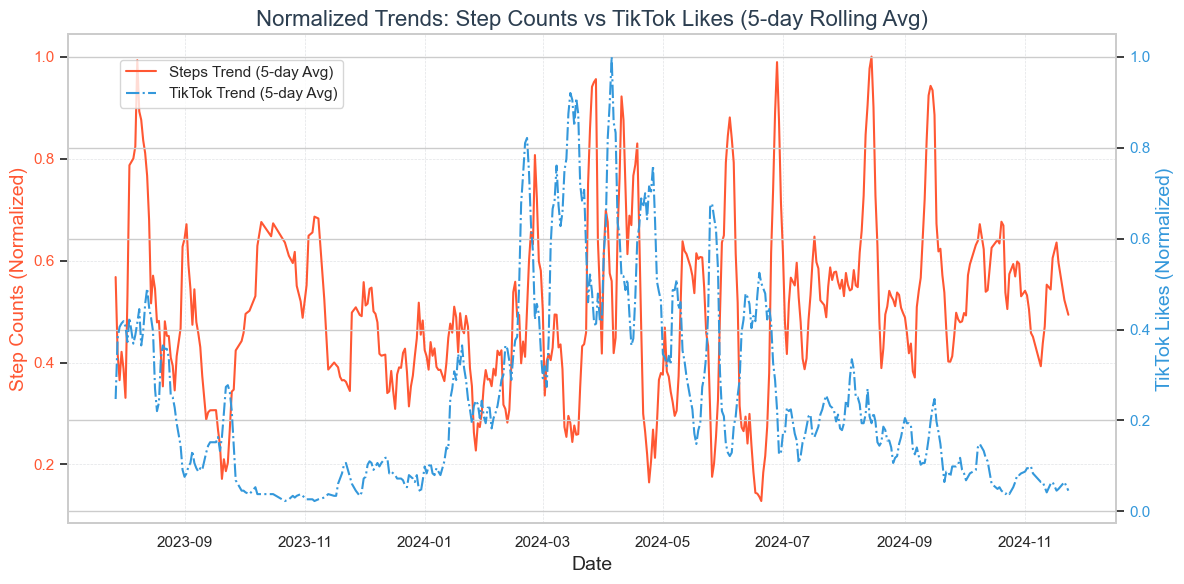

In [442]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your data is sorted by date
df_tiktok_health = df_tiktok_health.sort_values(by='date').reset_index(drop=True)

# Apply a 5-day rolling average to smooth the data
df_tiktok_health['Step Counts (Smoothed)'] = df_tiktok_health['Step Counts'].rolling(window=5, min_periods=1).mean()
df_tiktok_health['TikTok Likes (Smoothed)'] = df_tiktok_health['TikTok Likes'].rolling(window=5, min_periods=1).mean()

# Normalize the smoothed values for better comparison on the same graph
df_tiktok_health['Step Counts (Normalized)'] = df_tiktok_health['Step Counts (Smoothed)'] / df_tiktok_health['Step Counts (Smoothed)'].max()
df_tiktok_health['TikTok Likes (Normalized)'] = df_tiktok_health['TikTok Likes (Smoothed)'] / df_tiktok_health['TikTok Likes (Smoothed)'].max()

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot normalized step counts
ax1.plot(df_tiktok_health['date'], df_tiktok_health['Step Counts (Normalized)'], label='Steps Trend (5-day Avg)', color='#FF5733')  # Orange tone
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Step Counts (Normalized)', color='#FF5733', fontsize=14)  # Orange y-axis
ax1.tick_params(axis='y', labelcolor='#FF5733')

# Create a second y-axis for TikTok Likes
ax2 = ax1.twinx()
ax2.plot(df_tiktok_health['date'], df_tiktok_health['TikTok Likes (Normalized)'], label='TikTok Trend (5-day Avg)', color='#3498DB', linestyle='-.')  # Sky blue tone
ax2.set_ylabel('TikTok Likes (Normalized)', color='#3498DB', fontsize=14)  # Sky blue y-axis
ax2.tick_params(axis='y', labelcolor='#3498DB')

# Add a title
plt.title('Normalized Trends: Step Counts vs TikTok Likes (5-day Rolling Avg)', fontsize=16, color='#2C3E50')  # Dark gray title

# Add a legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Add grid for clarity
ax1.grid(color='#D5D8DC', linestyle='--', linewidth=0.5, alpha=0.7)  # Light gray grid

# Show the plot
plt.show()


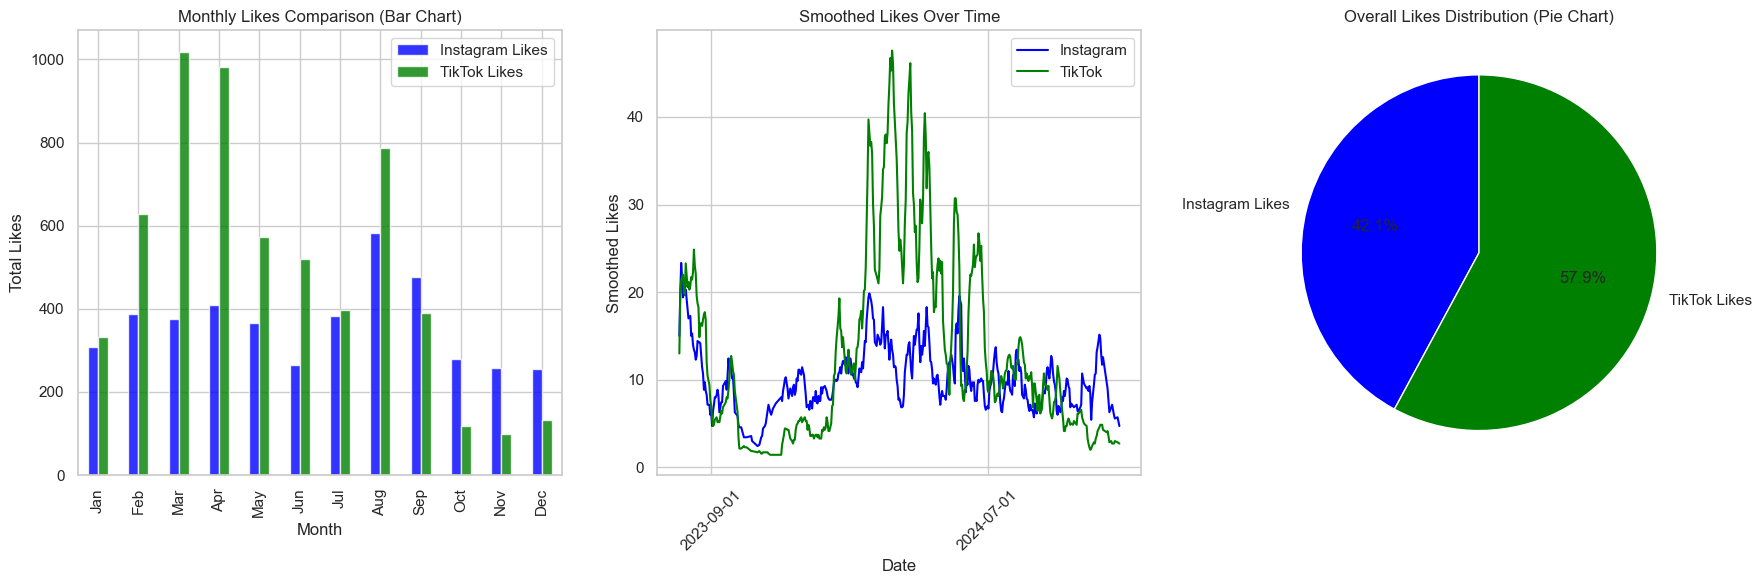

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_merged_likes is already defined and contains Instagram and TikTok likes with dates

# Extract the month names for grouping
df_merged_likes['month'] = df_merged_likes['date'].dt.strftime('%b')

# Group by month and calculate the total likes for each platform
grouped_df = df_merged_likes.groupby('month').agg({'Instagram Likes': 'sum', 'TikTok Likes': 'sum'}).reset_index()

# Ensure months are in chronological order
grouped_df = grouped_df.sort_values(by='month', key=lambda x: pd.to_datetime(x, format='%b'))

# Create smoothed data (rolling averages)
df_merged_likes = df_merged_likes.sort_values(by='date')  # Sort by date to apply rolling averages
df_normalized = df_merged_likes[['date', 'Instagram Likes', 'TikTok Likes']].copy()

# Apply rolling averages (7-day window as an example)
df_normalized['Instagram Smoothed'] = df_normalized['Instagram Likes'].rolling(window=7, min_periods=1).mean()
df_normalized['TikTok Smoothed'] = df_normalized['TikTok Likes'].rolling(window=7, min_periods=1).mean()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar Chart for Monthly Likes
grouped_df.plot(kind='bar', x='month', ax=axes[0], color=['blue', 'green'], alpha=0.8)
axes[0].set_title('Monthly Likes Comparison (Bar Chart)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Likes')

# Smoothed Line Plot
sns.lineplot(x='date', y='Instagram Smoothed', data=df_normalized, ax=axes[1], label='Instagram', color='blue')
sns.lineplot(x='date', y='TikTok Smoothed', data=df_normalized, ax=axes[1], label='TikTok', color='green')

axes[1].set_title('Smoothed Likes Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Smoothed Likes')
axes[1].legend()

# Adjust x-axis for better readability
axes[1].set_xticks(axes[1].get_xticks()[::5])
axes[1].tick_params(axis='x', rotation=45)

# Pie Chart for Total Likes
total_likes = df_merged_likes[['Instagram Likes', 'TikTok Likes']].sum()
axes[2].pie(total_likes, labels=['Instagram Likes', 'TikTok Likes'], autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
axes[2].set_title('Overall Likes Distribution (Pie Chart)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


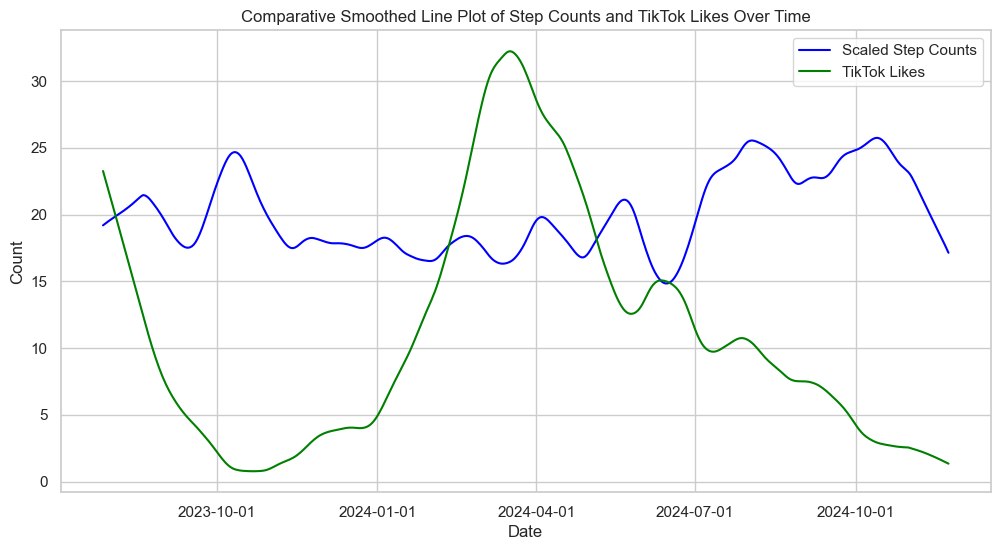

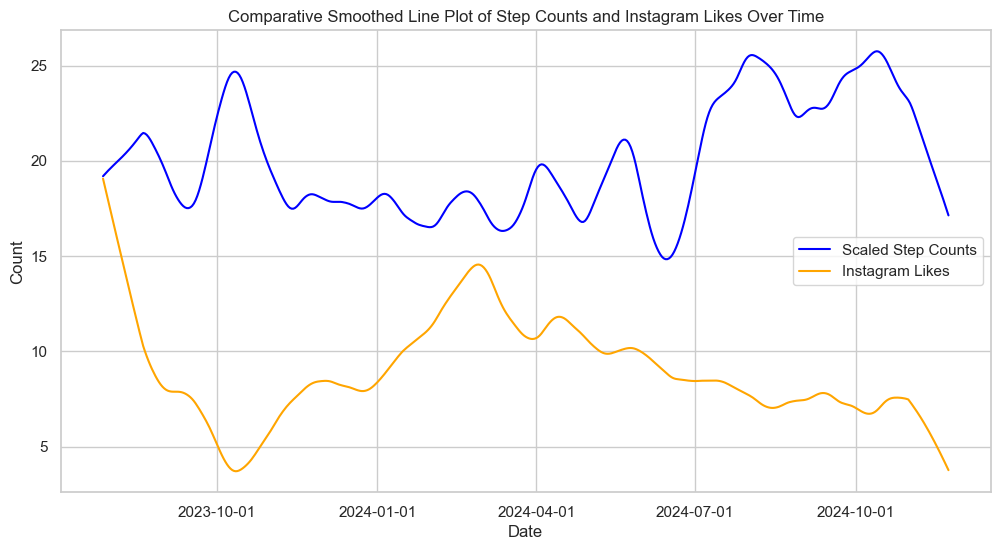

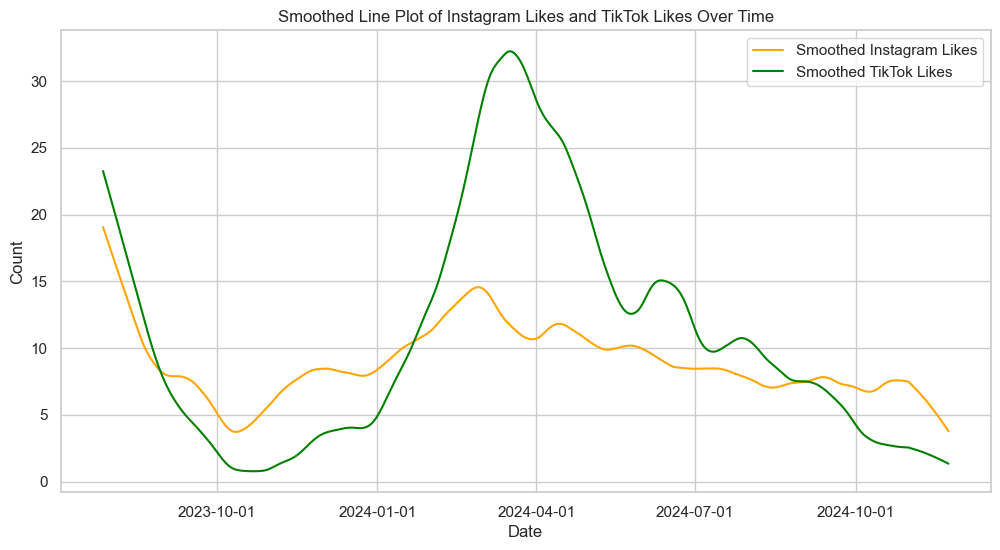

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
import pandas as pd

# Scale Step Counts proportionally for better comparison
step_scale_factor = df_merged_limited['TikTok Likes'].max() / df_merged_limited['Step Counts'].max()
df_merged_limited['Step Counts Scaled'] = df_merged_limited['Step Counts'] * step_scale_factor

# --- Smoothed Line Plot: Step Counts vs TikTok Likes ---
lowess_step_tiktok = sm.nonparametric.lowess(
    df_merged_limited['Step Counts Scaled'], 
    df_merged_limited['date'], 
    frac=0.1
)
lowess_tiktok = sm.nonparametric.lowess(df_merged_limited['TikTok Likes'], df_merged_limited['date'], frac=0.1)

df_smoothed_step_tiktok = pd.DataFrame(lowess_step_tiktok, columns=['date', 'smoothed_step'])
df_smoothed_tiktok = pd.DataFrame(lowess_tiktok, columns=['date', 'smoothed_tiktok'])

df_smoothed_step_tiktok['date'] = pd.to_datetime(df_smoothed_step_tiktok['date'])
df_smoothed_tiktok['date'] = pd.to_datetime(df_smoothed_tiktok['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='smoothed_step', data=df_smoothed_step_tiktok, label='Scaled Step Counts', color='blue')
sns.lineplot(x='date', y='smoothed_tiktok', data=df_smoothed_tiktok, label='TikTok Likes', color='green')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set x-axis ticks every 3 months
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparative Smoothed Line Plot of Step Counts and TikTok Likes Over Time')
plt.legend()
plt.show()

# --- Smoothed Line Plot: Step Counts vs Instagram Likes ---
lowess_step_insta = sm.nonparametric.lowess(
    df_merged_limited['Step Counts Scaled'], 
    df_merged_limited['date'], 
    frac=0.1
)
lowess_insta = sm.nonparametric.lowess(df_merged_limited['Instagram Likes'], df_merged_limited['date'], frac=0.1)

df_smoothed_step_insta = pd.DataFrame(lowess_step_insta, columns=['date', 'smoothed_step'])
df_smoothed_insta = pd.DataFrame(lowess_insta, columns=['date', 'smoothed_insta'])

df_smoothed_step_insta['date'] = pd.to_datetime(df_smoothed_step_insta['date'])
df_smoothed_insta['date'] = pd.to_datetime(df_smoothed_insta['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='smoothed_step', data=df_smoothed_step_insta, label='Scaled Step Counts', color='blue')
sns.lineplot(x='date', y='smoothed_insta', data=df_smoothed_insta, label='Instagram Likes', color='orange')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set x-axis ticks every 3 months
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparative Smoothed Line Plot of Step Counts and Instagram Likes Over Time')
plt.legend()
plt.show()


# --- Smoothed Line Plot: Instagram Likes vs TikTok Likes ---
lowess_insta_tiktok = sm.nonparametric.lowess(df_merged_limited['Instagram Likes'], df_merged_limited['date'], frac=0.1)
lowess_tiktok = sm.nonparametric.lowess(df_merged_limited['TikTok Likes'], df_merged_limited['date'], frac=0.1)

df_smoothed_insta_tiktok = pd.DataFrame(lowess_insta_tiktok, columns=['date', 'smoothed_insta'])
df_smoothed_tiktok = pd.DataFrame(lowess_tiktok, columns=['date', 'smoothed_tiktok'])

df_smoothed_insta_tiktok['date'] = pd.to_datetime(df_smoothed_insta_tiktok['date'])
df_smoothed_tiktok['date'] = pd.to_datetime(df_smoothed_tiktok['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='smoothed_insta', data=df_smoothed_insta_tiktok, label='Smoothed Instagram Likes', color='orange')
sns.lineplot(x='date', y='smoothed_tiktok', data=df_smoothed_tiktok, label='Smoothed TikTok Likes', color='green')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set x-axis ticks every 3 months
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Smoothed Line Plot of Instagram Likes and TikTok Likes Over Time')
plt.legend()
plt.show()


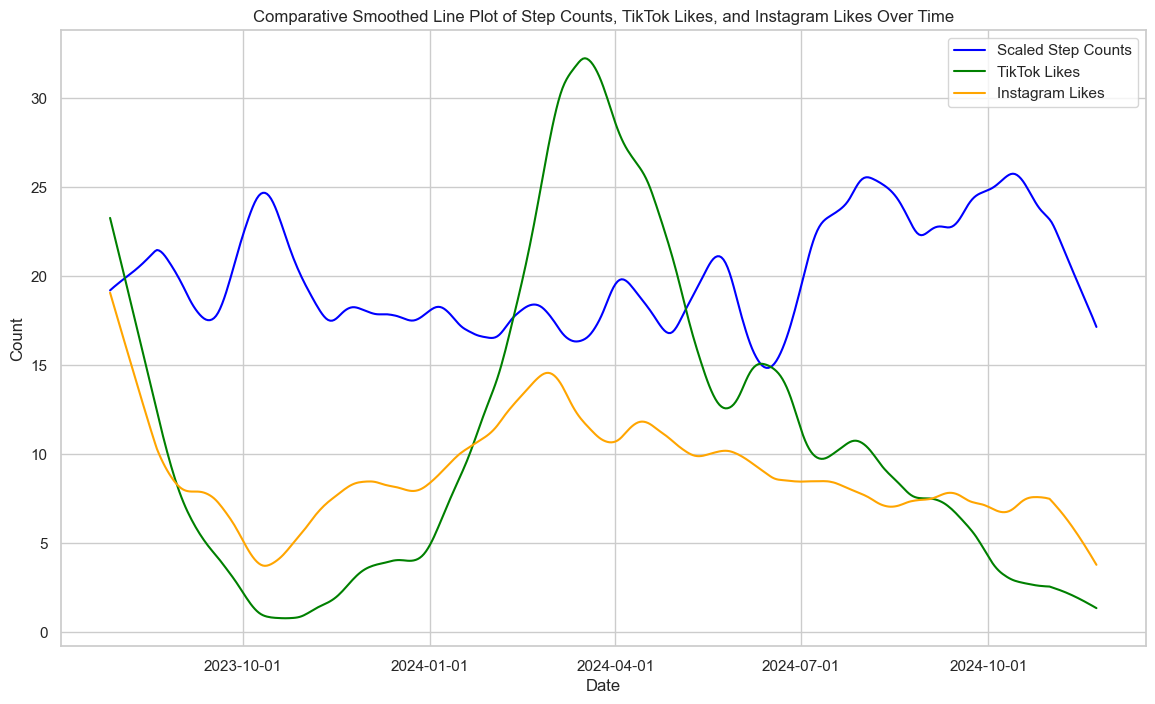

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
import pandas as pd

# Scale Step Counts proportionally for better comparison
step_scale_factor = df_merged_limited['TikTok Likes'].max() / df_merged_limited['Step Counts'].max()
df_merged_limited['Step Counts Scaled'] = df_merged_limited['Step Counts'] * step_scale_factor

# --- Smoothed Line Plot: Step Counts, TikTok Likes, Instagram Likes ---
lowess_step = sm.nonparametric.lowess(
    df_merged_limited['Step Counts Scaled'], 
    df_merged_limited['date'], 
    frac=0.1
)
lowess_tiktok = sm.nonparametric.lowess(
    df_merged_limited['TikTok Likes'], 
    df_merged_limited['date'], 
    frac=0.1
)
lowess_insta = sm.nonparametric.lowess(
    df_merged_limited['Instagram Likes'], 
    df_merged_limited['date'], 
    frac=0.1
)

# Create dataframes for smoothed values
df_smoothed_step = pd.DataFrame(lowess_step, columns=['date', 'smoothed_step'])
df_smoothed_tiktok = pd.DataFrame(lowess_tiktok, columns=['date', 'smoothed_tiktok'])
df_smoothed_insta = pd.DataFrame(lowess_insta, columns=['date', 'smoothed_insta'])

# Convert dates to datetime format
df_smoothed_step['date'] = pd.to_datetime(df_smoothed_step['date'])
df_smoothed_tiktok['date'] = pd.to_datetime(df_smoothed_tiktok['date'])
df_smoothed_insta['date'] = pd.to_datetime(df_smoothed_insta['date'])

# Plot all three smoothed trends on the same graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='smoothed_step', data=df_smoothed_step, label='Scaled Step Counts', color='blue')
sns.lineplot(x='date', y='smoothed_tiktok', data=df_smoothed_tiktok, label='TikTok Likes', color='green')
sns.lineplot(x='date', y='smoothed_insta', data=df_smoothed_insta, label='Instagram Likes', color='orange')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set x-axis ticks every 3 months
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparative Smoothed Line Plot of Step Counts, TikTok Likes, and Instagram Likes Over Time')
plt.legend()
plt.show()


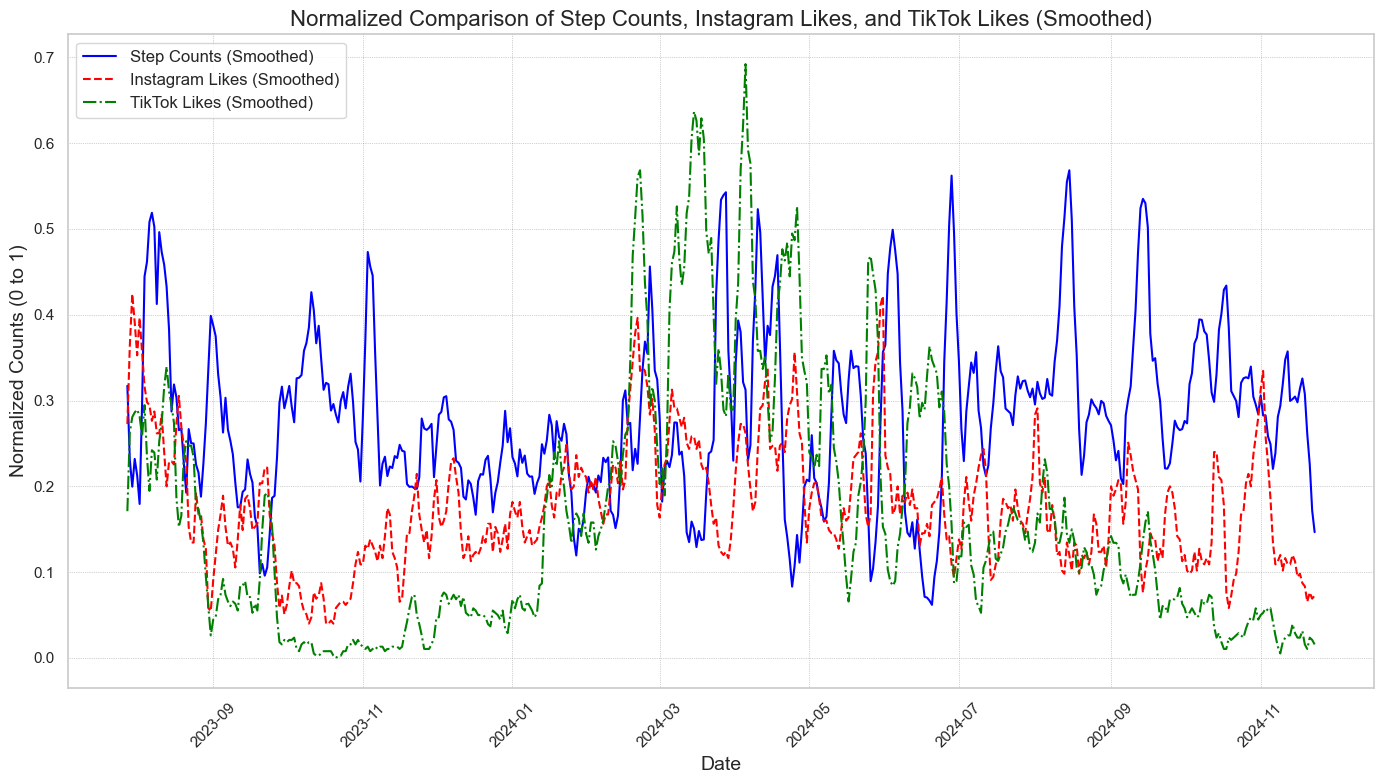

In [446]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Initialize a MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler()

# Normalize the data
df_merged_limited['Step Counts (Scaled)'] = scaler.fit_transform(df_merged_limited[['Step Counts']])
df_merged_limited['Instagram Likes (Scaled)'] = scaler.fit_transform(df_merged_limited[['Instagram Likes']])
df_merged_limited['TikTok Likes (Scaled)'] = scaler.fit_transform(df_merged_limited[['TikTok Likes']])

# Apply a rolling average for smoothing
df_merged_limited['Step Counts (Smoothed)'] = df_merged_limited['Step Counts (Scaled)'].rolling(window=5, min_periods=1).mean()
df_merged_limited['Instagram Likes (Smoothed)'] = df_merged_limited['Instagram Likes (Scaled)'].rolling(window=5, min_periods=1).mean()
df_merged_limited['TikTok Likes (Smoothed)'] = df_merged_limited['TikTok Likes (Scaled)'].rolling(window=5, min_periods=1).mean()

# Plot the smoothed data
plt.figure(figsize=(14, 8))

# Step Counts
plt.plot(df_merged_limited['date'], df_merged_limited['Step Counts (Smoothed)'], label='Step Counts (Smoothed)', color='blue', linestyle='-')

# Instagram Likes
plt.plot(df_merged_limited['date'], df_merged_limited['Instagram Likes (Smoothed)'], label='Instagram Likes (Smoothed)', color='red', linestyle='--')

# TikTok Likes
plt.plot(df_merged_limited['date'], df_merged_limited['TikTok Likes (Smoothed)'], label='TikTok Likes (Smoothed)', color='green', linestyle='-.')

# Adding labels and title
plt.title('Normalized Comparison of Step Counts, Instagram Likes, and TikTok Likes (Smoothed)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Counts (0 to 1)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add gridlines
plt.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


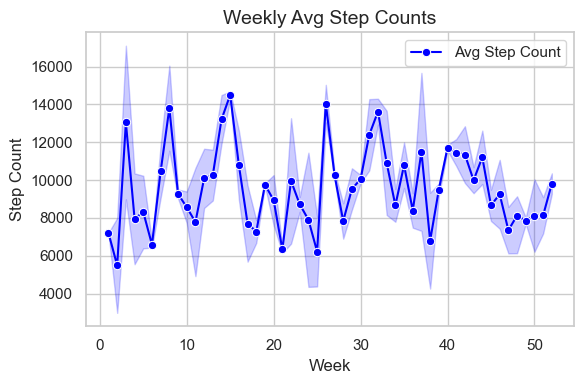

In [447]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all necessary columns are datetime formatted
df_filled['date'] = pd.to_datetime(df_filled['date'])
df_summary['date'] = pd.to_datetime(df_summary['date'])
df_tiktok['date'] = pd.to_datetime(df_tiktok['date'])

# Add 'week' and 'year' columns for weekly grouping
df_filled['week'] = df_filled['date'].dt.isocalendar().week
df_filled['year'] = df_filled['date'].dt.isocalendar().year

df_summary['week'] = df_summary['date'].dt.isocalendar().week
df_summary['year'] = df_summary['date'].dt.isocalendar().year

df_tiktok['week'] = df_tiktok['date'].dt.isocalendar().week
df_tiktok['year'] = df_tiktok['date'].dt.isocalendar().year

# Compute weekly averages
df_weekly_steps = df_filled.groupby(['year', 'week']).agg({'step_count': 'mean'}).reset_index()
df_weekly_instagram = df_summary.groupby(['year', 'week']).agg({'total_likes': 'mean'}).reset_index()
df_weekly_tiktok = df_tiktok.groupby(['year', 'week']).agg({'TikTok Likes': 'mean'}).reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Weekly Average Step Counts
plt.figure(figsize=(6, 4))
sns.lineplot(x='week', y='step_count', data=df_weekly_steps, label='Avg Step Count', marker='o', color='blue')
plt.title('Weekly Avg Step Counts', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Step Count', fontsize=12)
plt.tight_layout()
plt.show()


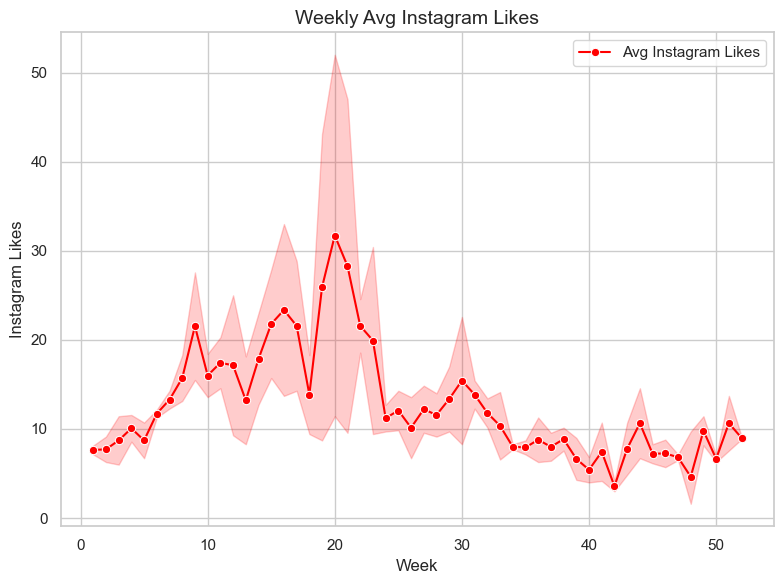

In [448]:
# Weekly Average Instagram Likes
plt.figure(figsize=(8, 6))
sns.lineplot(x='week', y='total_likes', data=df_weekly_instagram, label='Avg Instagram Likes', marker='o', color='red')
plt.title('Weekly Avg Instagram Likes', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Instagram Likes', fontsize=12)
plt.tight_layout()
plt.show()

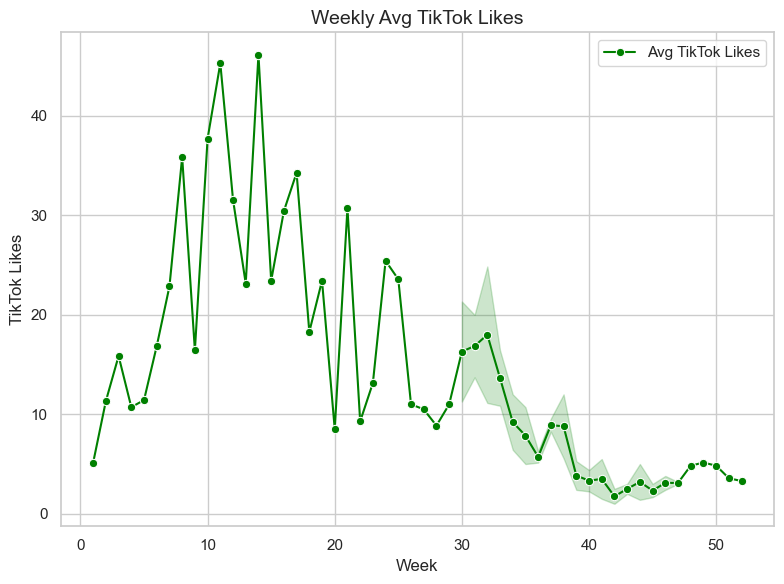

In [449]:
# Weekly Average TikTok Likes
plt.figure(figsize=(8, 6))
sns.lineplot(x='week', y='TikTok Likes', data=df_weekly_tiktok, label='Avg TikTok Likes', marker='o', color='green')
plt.title('Weekly Avg TikTok Likes', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('TikTok Likes', fontsize=12)
plt.tight_layout()
plt.show()

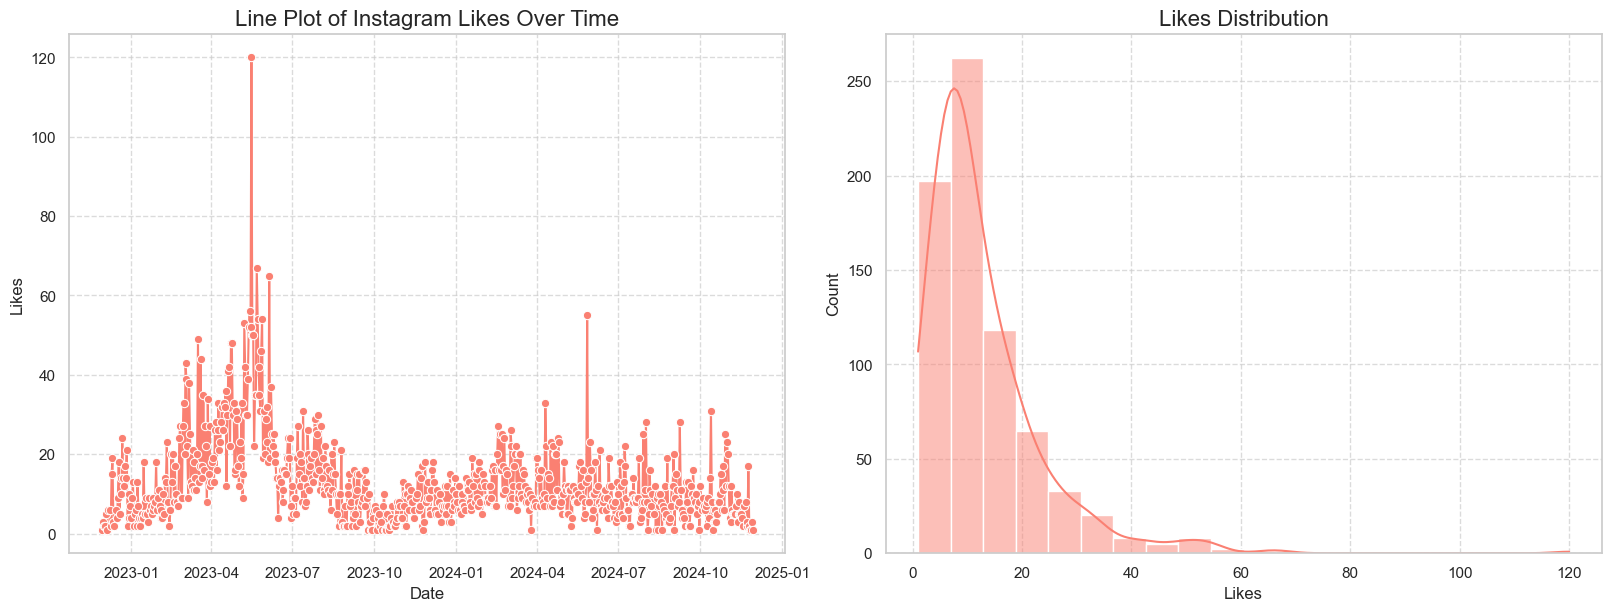

In [450]:
sns.set(style="whitegrid")

# Create a figure with two subplots for Instagram
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Instagram Likes Line Plot
sns.lineplot(x='date', y='total_likes', data=df_summary, color='salmon', marker='o', ax=axes[0])
axes[0].set_title('Line Plot of Instagram Likes Over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Likes', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Instagram Likes Histogram
sns.histplot(df_summary['total_likes'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Likes Distribution', fontsize=16)
axes[1].set_xlabel('Likes', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plots
plt.show()


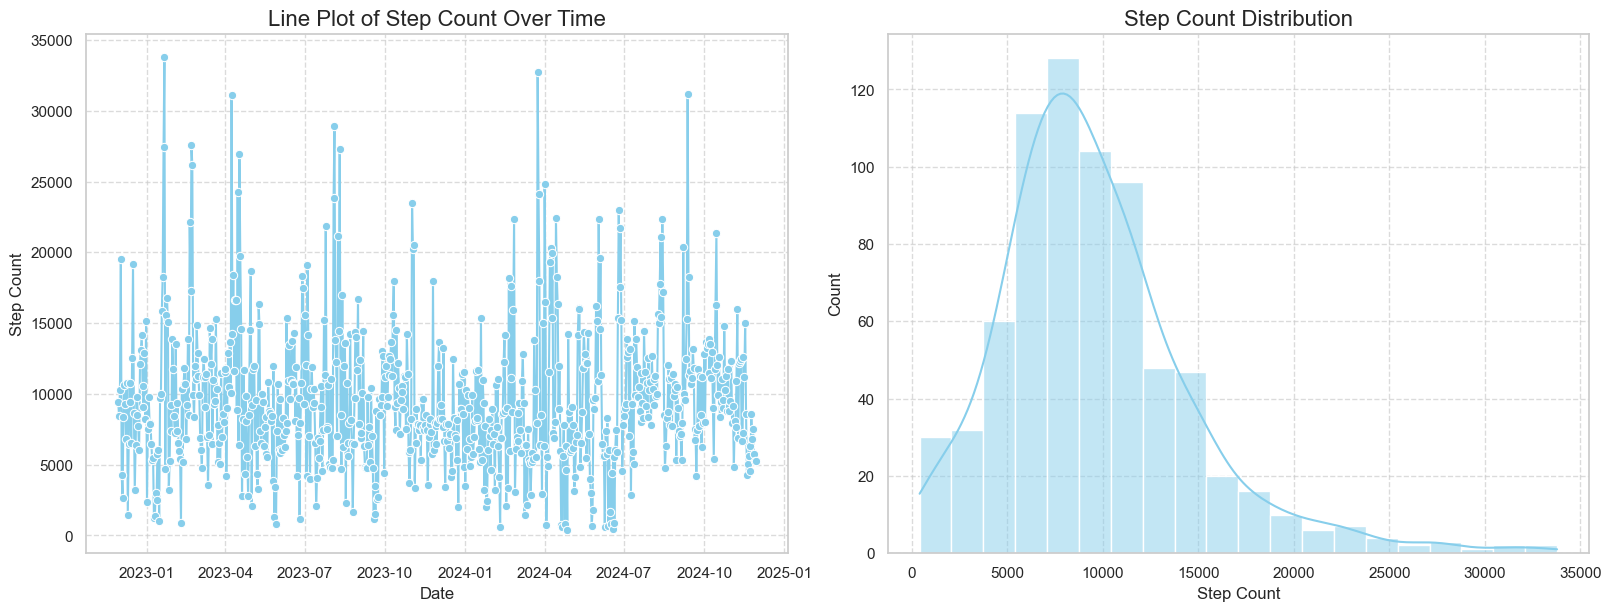

In [451]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Step Counts Line Plot
sns.lineplot(x='date', y='step_count', data=df_filled, color='skyblue', marker='o', ax=axes[0])
axes[0].set_title('Line Plot of Step Count Over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Step Count', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Step Counts Histogram
sns.histplot(df_filled['step_count'], bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Step Count Distribution', fontsize=16)
axes[1].set_xlabel('Step Count', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plots
plt.show()


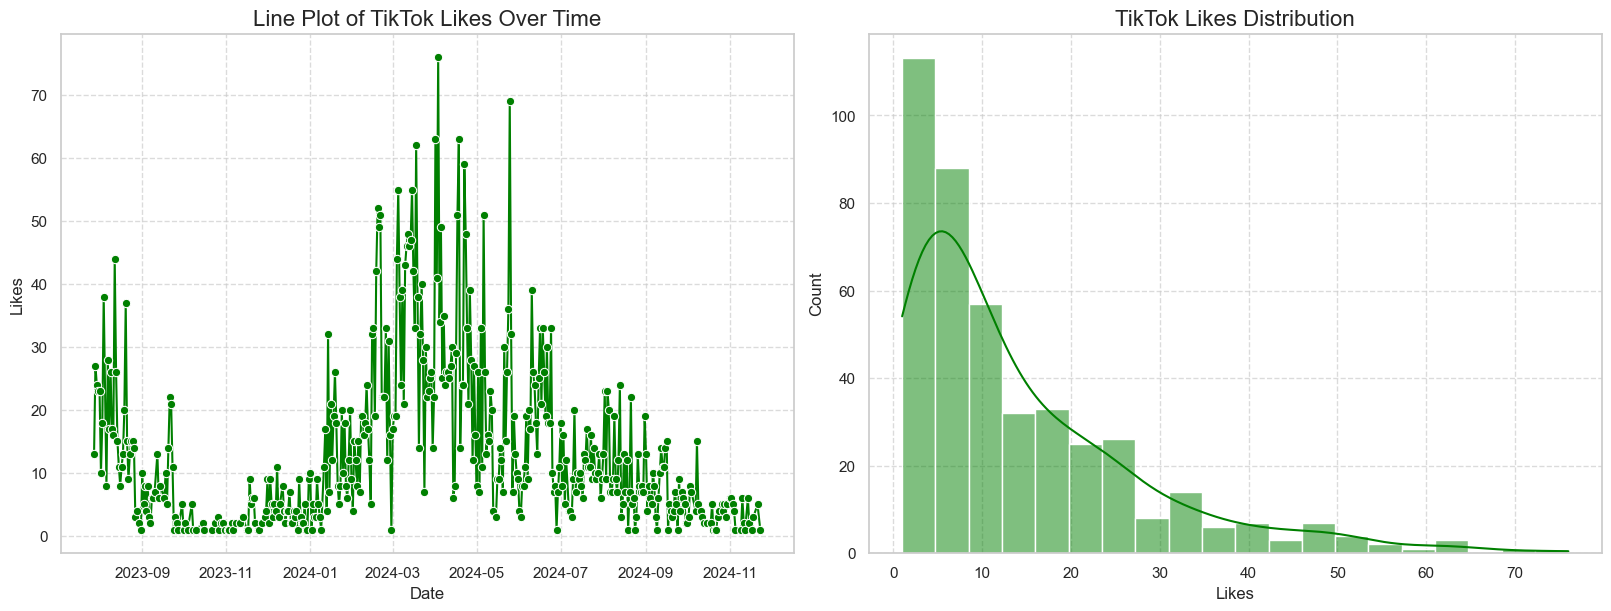

In [452]:
sns.set(style="whitegrid")

# Create a figure with two subplots for TikTok
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# TikTok Likes Line Plot
sns.lineplot(x='date', y='TikTok Likes', data=df_tiktok, color='green', marker='o', ax=axes[0])
axes[0].set_title('Line Plot of TikTok Likes Over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Likes', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# TikTok Likes Histogram
sns.histplot(df_tiktok['TikTok Likes'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('TikTok Likes Distribution', fontsize=16)
axes[1].set_xlabel('Likes', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Show the plots
plt.show()


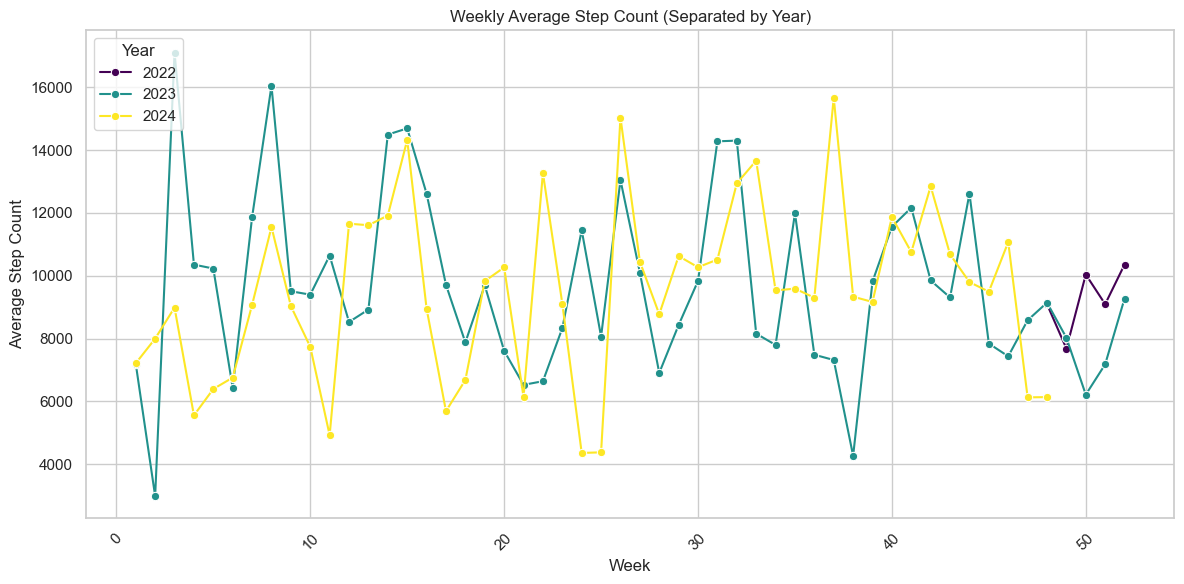

In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format for all datasets
df_filled['date'] = pd.to_datetime(df_filled['date'])

# Extract week and year for grouping
df_filled['week'] = df_filled['date'].dt.isocalendar().week
df_filled['year'] = df_filled['date'].dt.isocalendar().year

# Group by year and week, calculating the weekly average for step counts
df_weekly_avg = df_filled.groupby(['year', 'week']).agg({
    'step_count': 'mean',
    'date': 'first'  # To ensure we keep a representative date
}).reset_index()

# Set the seaborn style
sns.set(style="whitegrid")

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='step_count', data=df_weekly_avg, hue='year', palette='viridis', marker='o')

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Average Step Count')
plt.title('Weekly Average Step Count (Separated by Year)')
plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()


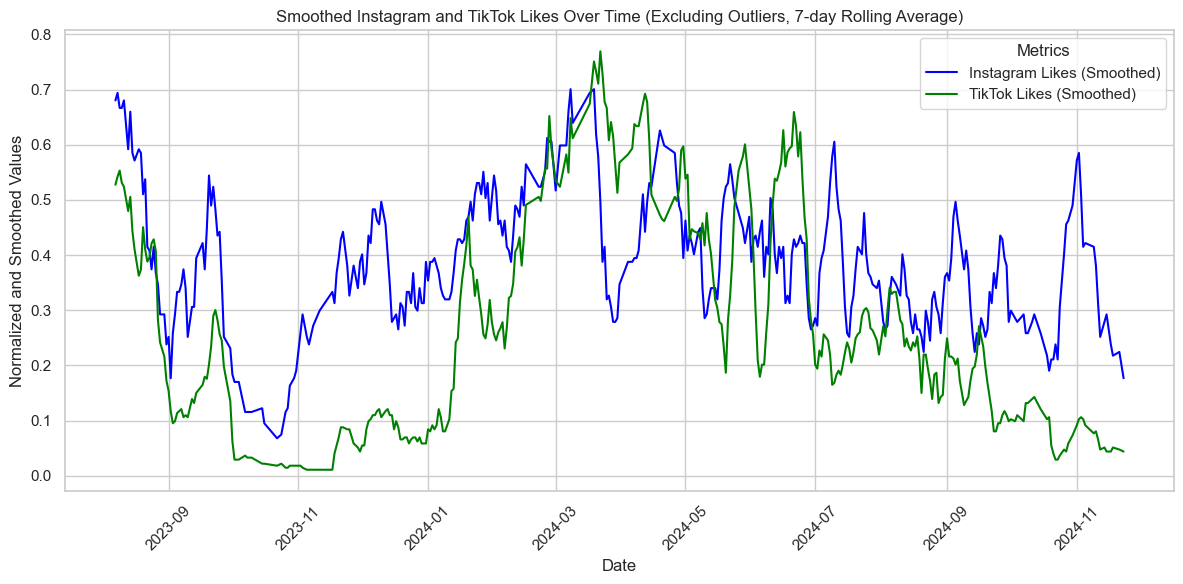

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Copy data for normalization
df_normalized = df_filtered_common.copy()

# Set the threshold for outliers
std_dev_threshold = 2

# Normalize Instagram Likes
mean_instagram = df_normalized['Instagram Likes'].mean()
std_instagram = df_normalized['Instagram Likes'].std()
df_normalized = df_normalized[
    (df_normalized['Instagram Likes'] >= mean_instagram - std_dev_threshold * std_instagram) &
    (df_normalized['Instagram Likes'] <= mean_instagram + std_dev_threshold * std_instagram)
]

# Normalize TikTok Likes
mean_tiktok = df_normalized['TikTok Likes'].mean()
std_tiktok = df_normalized['TikTok Likes'].std()
df_normalized = df_normalized[
    (df_normalized['TikTok Likes'] >= mean_tiktok - std_dev_threshold * std_tiktok) &
    (df_normalized['TikTok Likes'] <= mean_tiktok + std_dev_threshold * std_tiktok)
]

# Apply MinMaxScaler for normalization
scaler = MinMaxScaler()
df_normalized[['Instagram Likes', 'TikTok Likes']] = scaler.fit_transform(
    df_normalized[['Instagram Likes', 'TikTok Likes']]
)

# Apply a rolling average for smoothing
window_size = 7  # Specify the rolling window size
df_normalized[['Instagram Likes', 'TikTok Likes']] = df_normalized[['Instagram Likes', 'TikTok Likes']].rolling(window=window_size).mean()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the smoothed data
plt.figure(figsize=(12, 6))

# Instagram Likes plot
sns.lineplot(
    x='date', 
    y='Instagram Likes', 
    data=df_normalized, 
    label='Instagram Likes (Smoothed)', 
    color='blue'
)

# TikTok Likes plot
sns.lineplot(
    x='date', 
    y='TikTok Likes', 
    data=df_normalized, 
    label='TikTok Likes (Smoothed)', 
    color='green'
)

# Add titles and labels
plt.title(f"Smoothed Instagram and TikTok Likes Over Time (Excluding Outliers, {window_size}-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Normalized and Smoothed Values")
plt.xticks(rotation=45)
plt.legend(title="Metrics")

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\3007120556.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_steps_by_day.index, y=avg_steps_by_day.values, palette="Oranges_d", ax=axes[0])
C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\3007120556.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='Average Step Count', data=step_avg, palette='Blues', ax=axes[1])


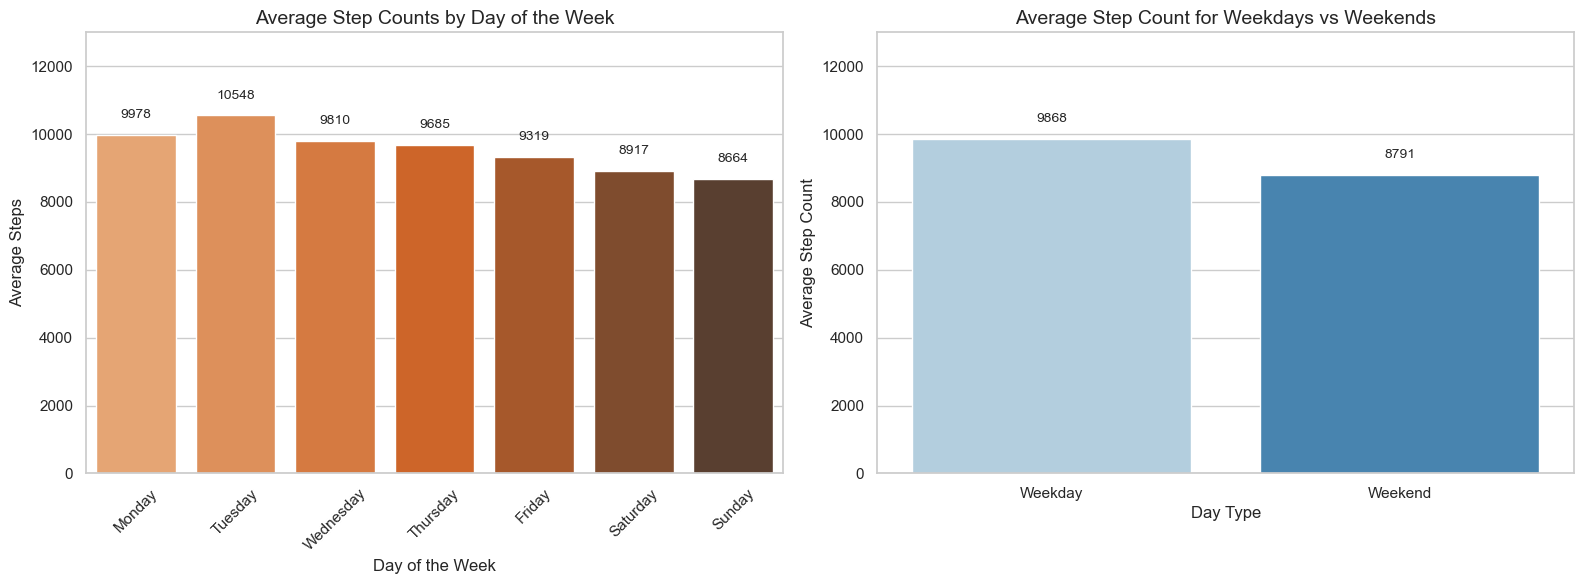

In [455]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filled is already defined and contains 'date' and 'step_count'
# Extract the day of the week
df_filled['day_of_week'] = df_filled['date'].dt.day_name()

# Calculate the average steps by day of the week
avg_steps_by_day = df_filled.groupby('day_of_week')['step_count'].mean()

# Ensure days are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_steps_by_day = avg_steps_by_day.reindex(day_order)

# Create a new column for weekdays vs weekends
df_filled['day_type'] = df_filled['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate the average step count for weekdays and weekends
step_avg = df_filled.groupby('day_type')['step_count'].mean().reset_index()
step_avg.rename(columns={'step_count': 'Average Step Count'}, inplace=True)

# Plotting
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot 1: Step Counts by Day of the Week
sns.barplot(x=avg_steps_by_day.index, y=avg_steps_by_day.values, palette="Oranges_d", ax=axes[0])
axes[0].set_title("Average Step Counts by Day of the Week", fontsize=14)
axes[0].set_xlabel("Day of the Week", fontsize=12)
axes[0].set_ylabel("Average Steps", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 13000)  # Adjust the y-limit to provide more space

# Add numbers on top of the bars for Step Counts
for index, value in enumerate(avg_steps_by_day.values):
    axes[0].text(index, value + 500, f'{int(value)}', ha='center', fontsize=10)

# Plot 2: Step Counts for Weekdays vs Weekends
sns.barplot(x='day_type', y='Average Step Count', data=step_avg, palette='Blues', ax=axes[1])
axes[1].set_title('Average Step Count for Weekdays vs Weekends', fontsize=14)
axes[1].set_xlabel('Day Type', fontsize=12)
axes[1].set_ylabel('Average Step Count', fontsize=12)
axes[1].set_ylim(0, 13000)  # Adjust the y-limit for better spacing

# Add numbers on top of the bars for Weekdays vs Weekends
for index, row in step_avg.iterrows():
    axes[1].text(index, row['Average Step Count'] + 500, f'{int(row["Average Step Count"])}', ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\3710481455.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_likes_by_day_instagram.index, y=avg_likes_by_day_instagram.values, palette="Blues_d")


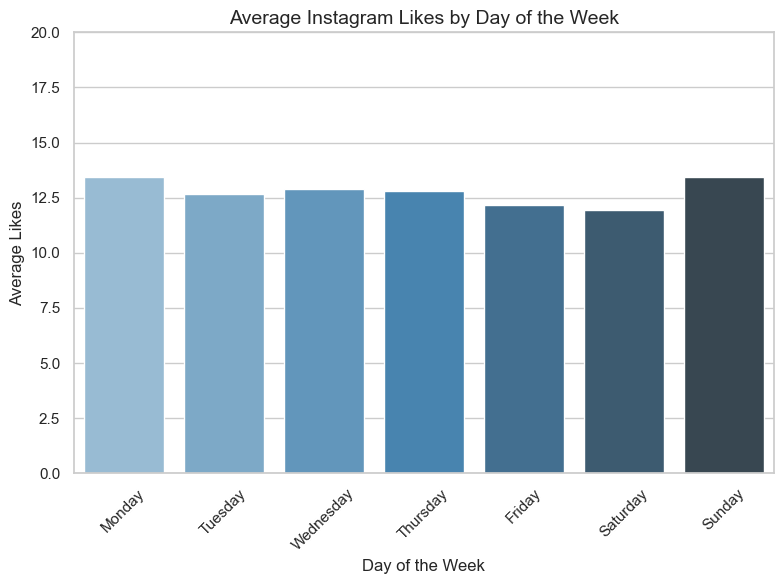

In [456]:
# Calculate the day of the week for Instagram data
df_summary['day_of_week'] = df_summary['date'].dt.day_name()

# Calculate the average Instagram likes by day of the week
avg_likes_by_day_instagram = df_summary.groupby('day_of_week')['total_likes'].mean()

# Ensure the days of the week are in the correct order
avg_likes_by_day_instagram = avg_likes_by_day_instagram.reindex(day_order)

# Plot for Instagram Likes
sns.set(style="whitegrid")  # Maintain the whitegrid style

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_likes_by_day_instagram.index, y=avg_likes_by_day_instagram.values, palette="Blues_d")
plt.title("Average Instagram Likes by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Likes", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 20)  # Adjust the y-limit to 20
plt.tight_layout()
plt.show()


In [457]:
print(df_tiktok.head())
print(df_tiktok.columns)


        date  TikTok Likes  week  year
0 2023-07-28            13    30  2023
1 2023-07-29            27    30  2023
2 2023-07-30            24    30  2023
3 2023-07-31            23    31  2023
4 2023-08-01            23    31  2023
Index(['date', 'TikTok Likes', 'week', 'year'], dtype='object')


Columns in df_tiktok: Index(['date', 'TikTok Likes', 'week', 'year'], dtype='object')


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\959666223.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_likes_by_day_tiktok.index, y=avg_likes_by_day_tiktok.values, palette="Greens_d")


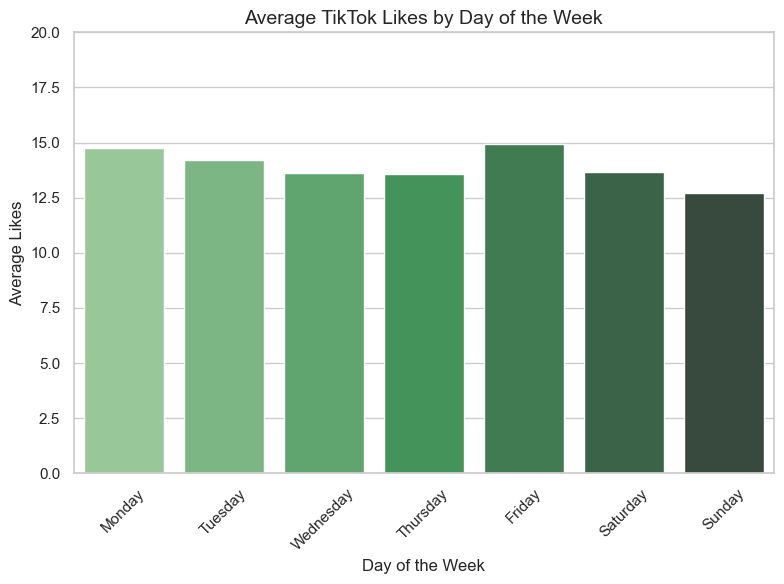

In [458]:
# Verify column structure
print("Columns in df_tiktok:", df_tiktok.columns)

# Add 'day_of_week' column (already exists, but ensuring for consistency)
df_tiktok['day_of_week'] = pd.to_datetime(df_tiktok['date']).dt.day_name()

# Group by 'day_of_week' and calculate the mean
if 'TikTok Likes' in df_tiktok.columns:
    avg_likes_by_day_tiktok = df_tiktok.groupby('day_of_week')['TikTok Likes'].mean()
else:
    raise KeyError("The column 'TikTok Likes' is missing in df_tiktok. Please verify the data extraction step.")

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_likes_by_day_tiktok = avg_likes_by_day_tiktok.reindex(day_order)

# Plot the bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_likes_by_day_tiktok.index, y=avg_likes_by_day_tiktok.values, palette="Greens_d")
plt.title("Average TikTok Likes by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Likes", fontsize=12)
plt.ylim(0, 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\1535548395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_steps_by_day.index, y=avg_steps_by_day.values, palette="Oranges_d")


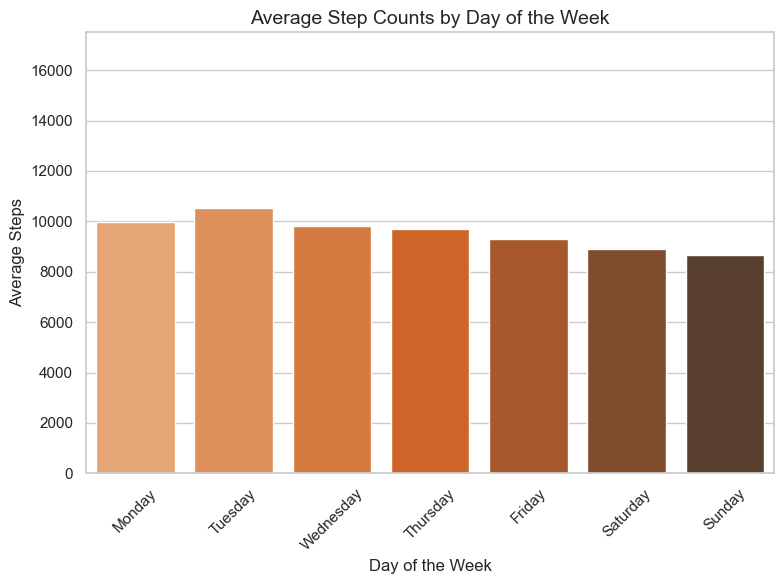

In [459]:
sns.set(style="whitegrid")

# Create a bar plot for Step Counts
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_steps_by_day.index, y=avg_steps_by_day.values, palette="Oranges_d")
plt.title("Average Step Counts by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Steps", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 17500)  # Adjust the y-limit to 17500 for Step Counts
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\281265251.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='step_count', data=df_filled, palette="Blues")


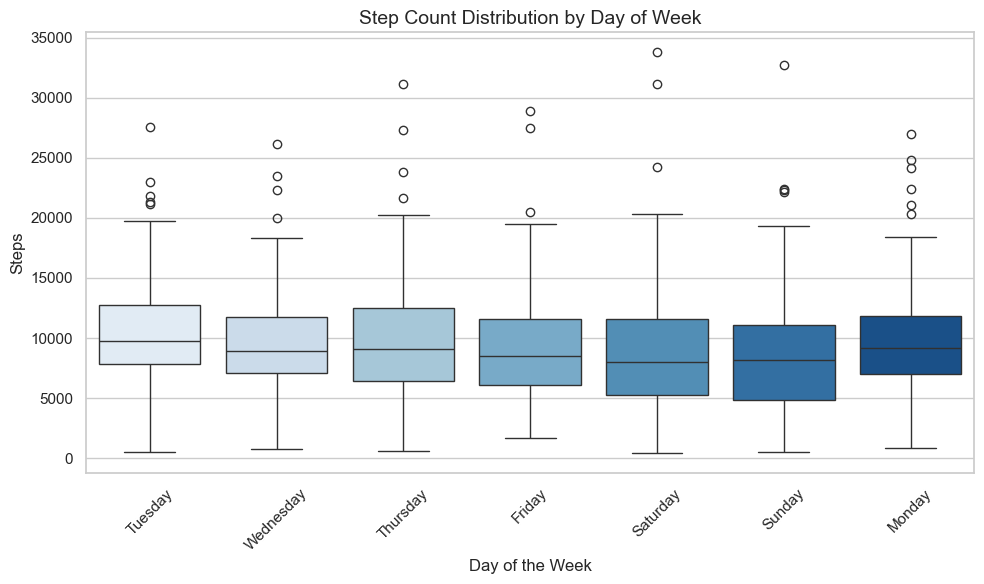

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
df_filled['date'] = pd.to_datetime(df_filled['date'])

# Add a 'day_of_week' column to the DataFrame
df_filled['day_of_week'] = df_filled['date'].dt.day_name()

# Set the seaborn style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='step_count', data=df_filled, palette="Blues")

# Set the title and labels
plt.title("Step Count Distribution by Day of Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Steps", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\2190748731.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=instagram_avg_month.index, y=instagram_avg_month.values, ax=axes[0], palette="Blues_d")
C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\2190748731.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tiktok_avg_month.index, y=tiktok_avg_month.values, ax=axes[1], palette="Greens_d")
C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\2190748731.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=step_avg_month.index, y=step

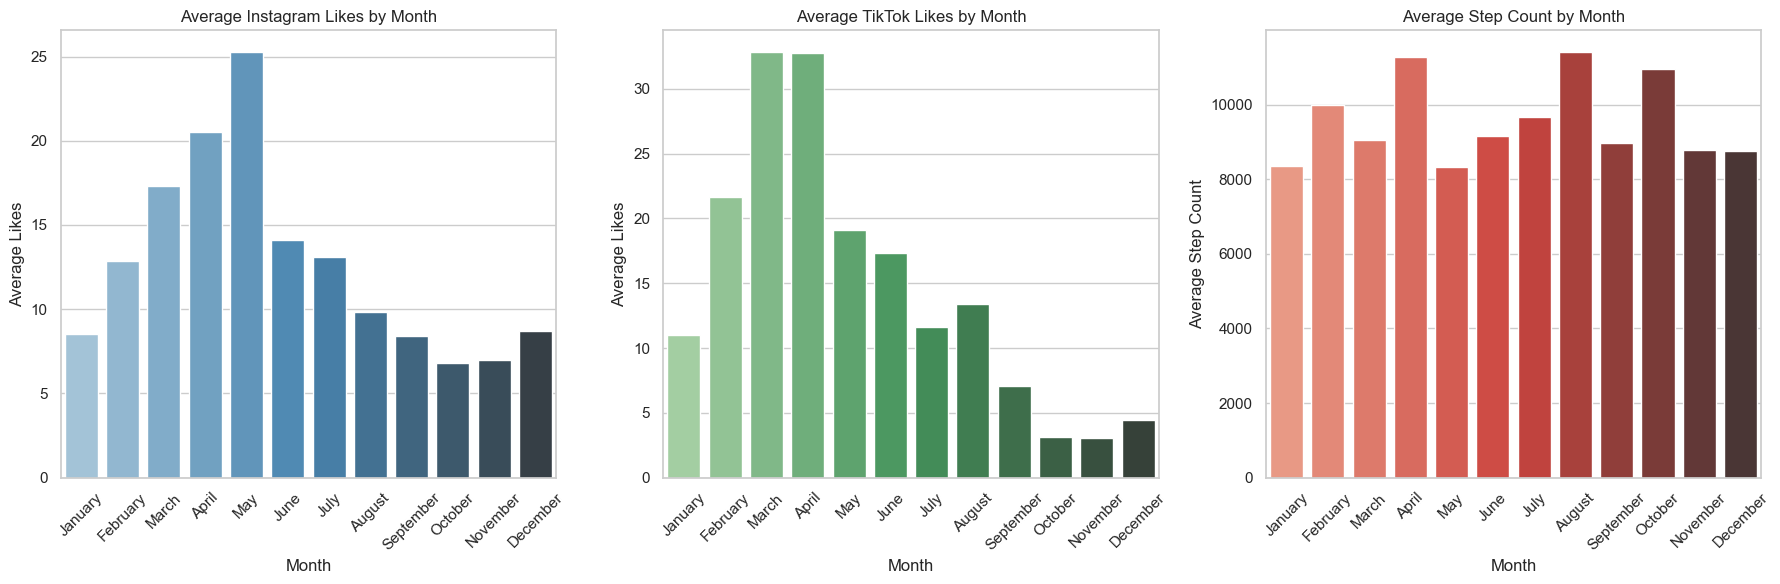

In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average Instagram likes by month
df_summary['month'] = df_summary['date'].dt.month_name()
instagram_avg_month = df_summary.groupby('month')['total_likes'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
])

# Calculate average TikTok likes by month
df_tiktok['month'] = df_tiktok['date'].dt.month_name()
tiktok_avg_month = df_tiktok.groupby('month')['TikTok Likes'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
])

# Calculate average step counts by month
df_filled['month'] = df_filled['date'].dt.month_name()
step_avg_month = df_filled.groupby('month')['step_count'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
])

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots for horizontal alignment
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot Instagram Likes
sns.barplot(x=instagram_avg_month.index, y=instagram_avg_month.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Average Instagram Likes by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Average Likes")
axes[0].tick_params(axis='x', rotation=45)

# Plot TikTok Likes
sns.barplot(x=tiktok_avg_month.index, y=tiktok_avg_month.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Average TikTok Likes by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Likes")
axes[1].tick_params(axis='x', rotation=45)

# Plot Step Counts
sns.barplot(x=step_avg_month.index, y=step_avg_month.values, ax=axes[2], palette="Reds_d")
axes[2].set_title("Average Step Count by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Average Step Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


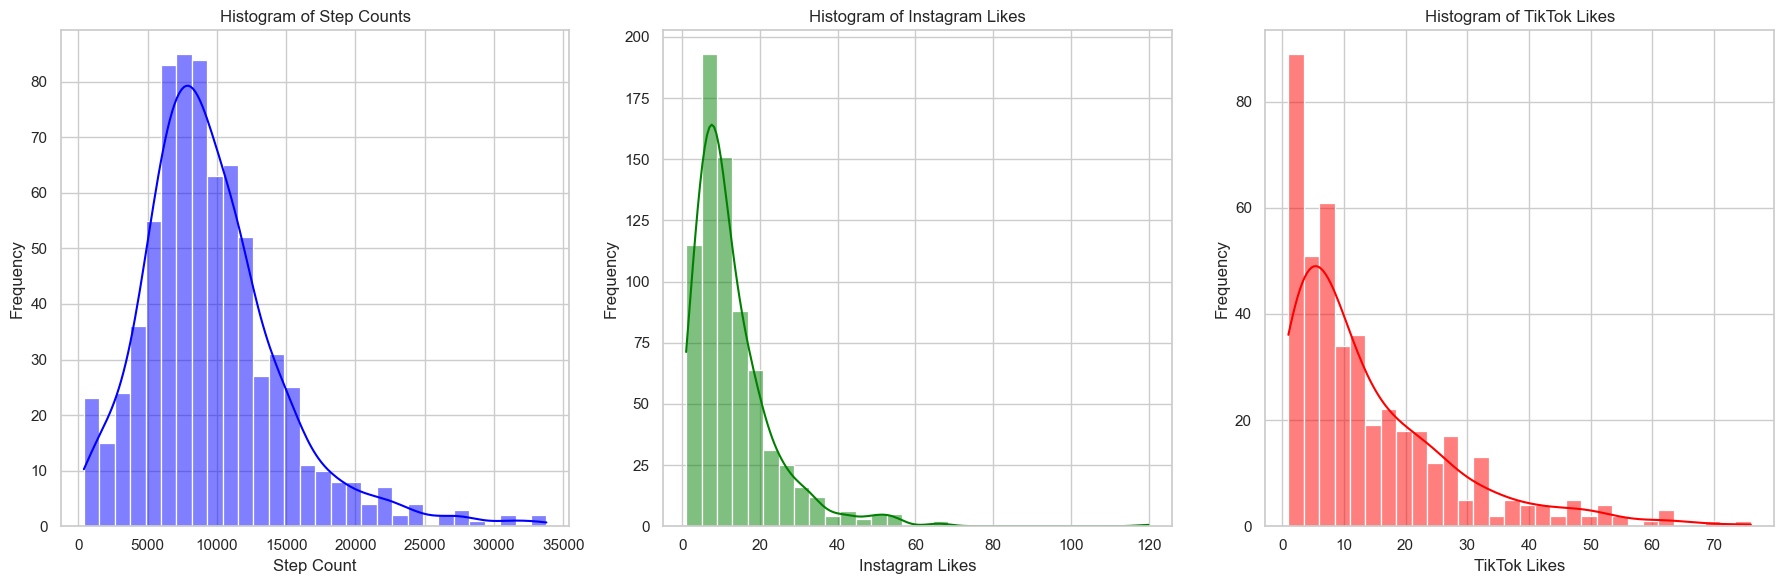

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot style
sns.set(style="whitegrid")

# Create subplots for horizontal alignment
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot histogram for Step Counts
sns.histplot(data=df_filled, x='step_count', kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title("Histogram of Step Counts")
axes[0].set_xlabel("Step Count")
axes[0].set_ylabel("Frequency")

# Plot histogram for Instagram Likes
sns.histplot(data=df_summary, x='total_likes', kde=True, ax=axes[1], color='green', bins=30)
axes[1].set_title("Histogram of Instagram Likes")
axes[1].set_xlabel("Instagram Likes")
axes[1].set_ylabel("Frequency")

# Plot histogram for TikTok Likes
sns.histplot(data=df_tiktok, x='TikTok Likes', kde=True, ax=axes[2], color='red', bins=30)
axes[2].set_title("Histogram of TikTok Likes")
axes[2].set_xlabel("TikTok Likes")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


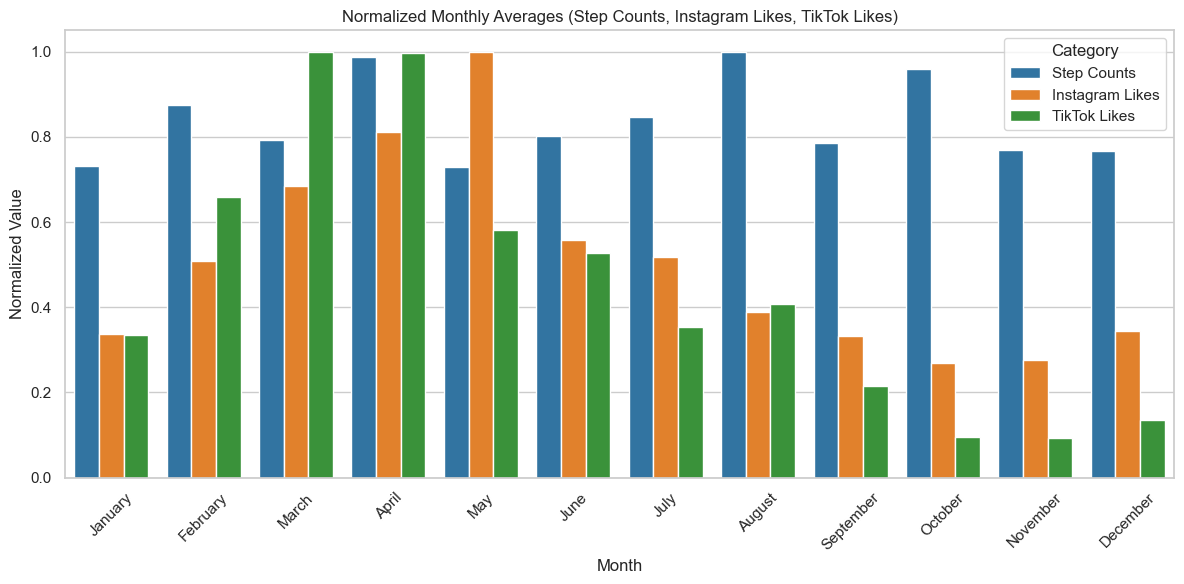

In [463]:
# Normalize the data (Step Counts, Instagram Likes, TikTok Likes)
df_summary['month'] = pd.to_datetime(df_summary['date']).dt.strftime('%B')  # Extract month name for Instagram Likes
df_tiktok['month'] = pd.to_datetime(df_tiktok['date']).dt.strftime('%B')  # Extract month name for TikTok Likes
df_filled['month'] = pd.to_datetime(df_filled['date']).dt.strftime('%B')  # Extract month name for Step Counts

# Calculate monthly averages for each category
step_monthly_avg = df_filled.groupby('month')['step_count'].mean().rename("Step Counts")
insta_monthly_avg = df_summary.groupby('month')['total_likes'].mean().rename("Instagram Likes")
tiktok_monthly_avg = df_tiktok.groupby('month')['TikTok Likes'].mean().rename("TikTok Likes")

# Combine into a single DataFrame
monthly_avg = pd.concat([step_monthly_avg, insta_monthly_avg, tiktok_monthly_avg], axis=1).reset_index()

# Normalize the data
monthly_avg_normalized = monthly_avg.set_index('month').apply(lambda x: x / x.max()).reset_index()

# Melt the data for visualization
df_melted = monthly_avg_normalized.melt(id_vars='month', var_name='Category', value_name='Normalized Value')

# Ensure months are ordered correctly
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_melted['month'] = pd.Categorical(df_melted['month'], categories=month_order, ordered=True)

# Plot the normalized bar graph with distinctive colors
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x='month',
    y='Normalized Value',
    hue='Category',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green for distinction
)

# Customize the plot
plt.title("Normalized Monthly Averages (Step Counts, Instagram Likes, TikTok Likes)")
plt.xlabel("Month")
plt.ylabel("Normalized Value")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()


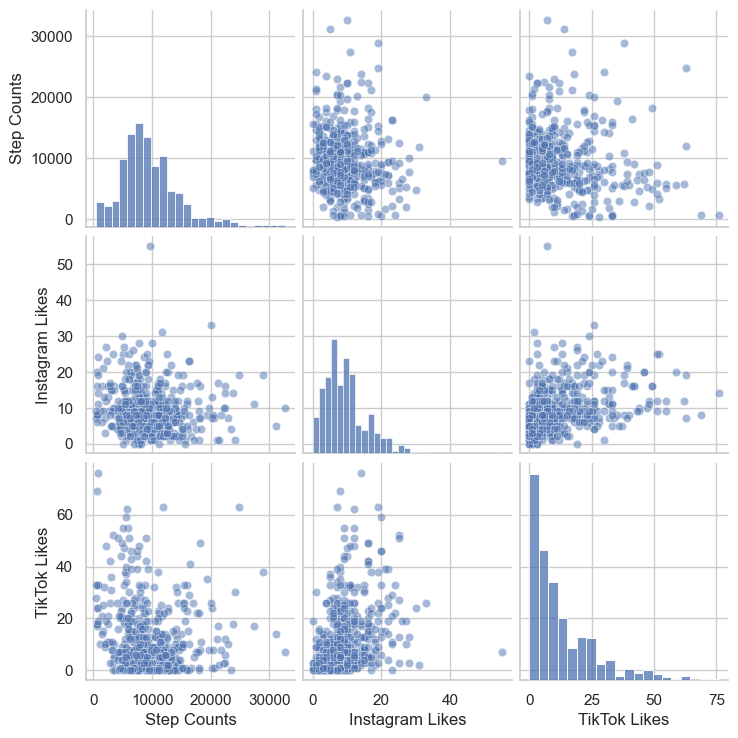

In [464]:
# Prepare data for pair plot
# Assuming df_merged_limited contains the final merged data
df_pair_plot = df_merged_limited[['Step Counts', 'Instagram Likes', 'TikTok Likes']]

# Create a pair plot
sns.set(style="whitegrid")
sns.pairplot(df_pair_plot, diag_kind="hist", markers="o", plot_kws={'alpha': 0.5})

# Show the plot
plt.show()


                 Step Counts  Instagram Likes  TikTok Likes
Step Counts         1.000000        -0.090585     -0.135595
Instagram Likes    -0.090585         1.000000      0.313887
TikTok Likes       -0.135595         0.313887      1.000000


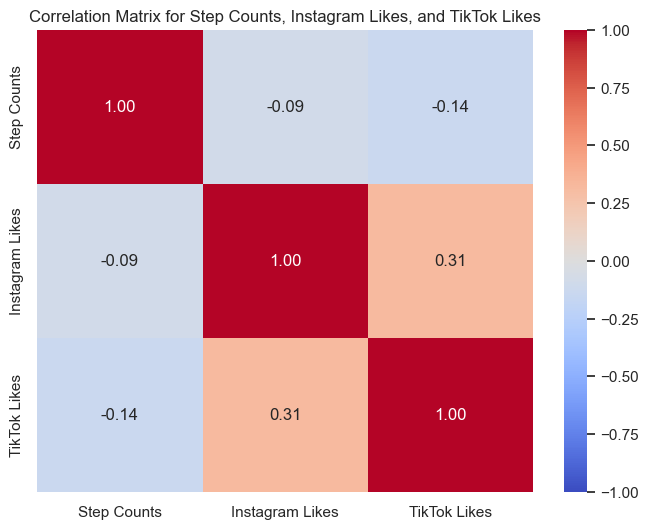

In [465]:
# Correlation Matrix for Step Counts, Instagram Likes, and TikTok Likes
correlation_matrix = df_merged_limited[['Step Counts', 'Instagram Likes', 'TikTok Likes']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Add title
plt.title('Correlation Matrix for Step Counts, Instagram Likes, and TikTok Likes')

# Display the plot
plt.show()


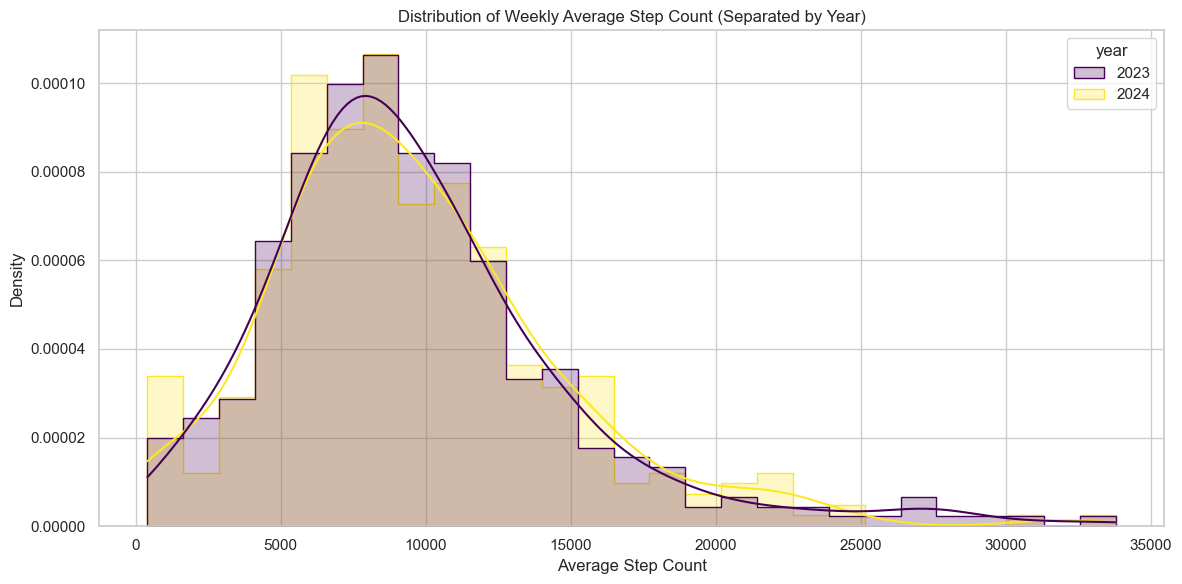

In [466]:
# Step count verileri için yıllara göre grup oluşturma
df_filled['year'] = pd.to_datetime(df_filled['date']).dt.year
df_weekly_avg = df_filled.groupby(['year', 'date']).agg({'step_count': 'mean'}).reset_index()

# Sadece 2023 ve 2024 yıllarını filtreleme
df_weekly_avg_filtered = df_weekly_avg[(df_weekly_avg['year'] == 2023) | (df_weekly_avg['year'] == 2024)]

# Grafik için ayarları yapma
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_weekly_avg_filtered,
    x='step_count',
    hue='year',
    element='step',
    stat='density',
    common_norm=False,
    kde=True,
    palette='viridis'
)

plt.xlabel('Average Step Count')
plt.ylabel('Density')
plt.title('Distribution of Weekly Average Step Count (Separated by Year)')
plt.tight_layout()
plt.show()


C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\233598527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='Average Step Count', data=step_avg, ax=axes[0], palette='Blues')
C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\233598527.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='Average Instagram Likes', data=insta_avg, ax=axes[1], palette='Oranges')
C:\Users\Umutk\AppData\Local\Temp\ipykernel_22520\233598527.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='Average TikTok Like

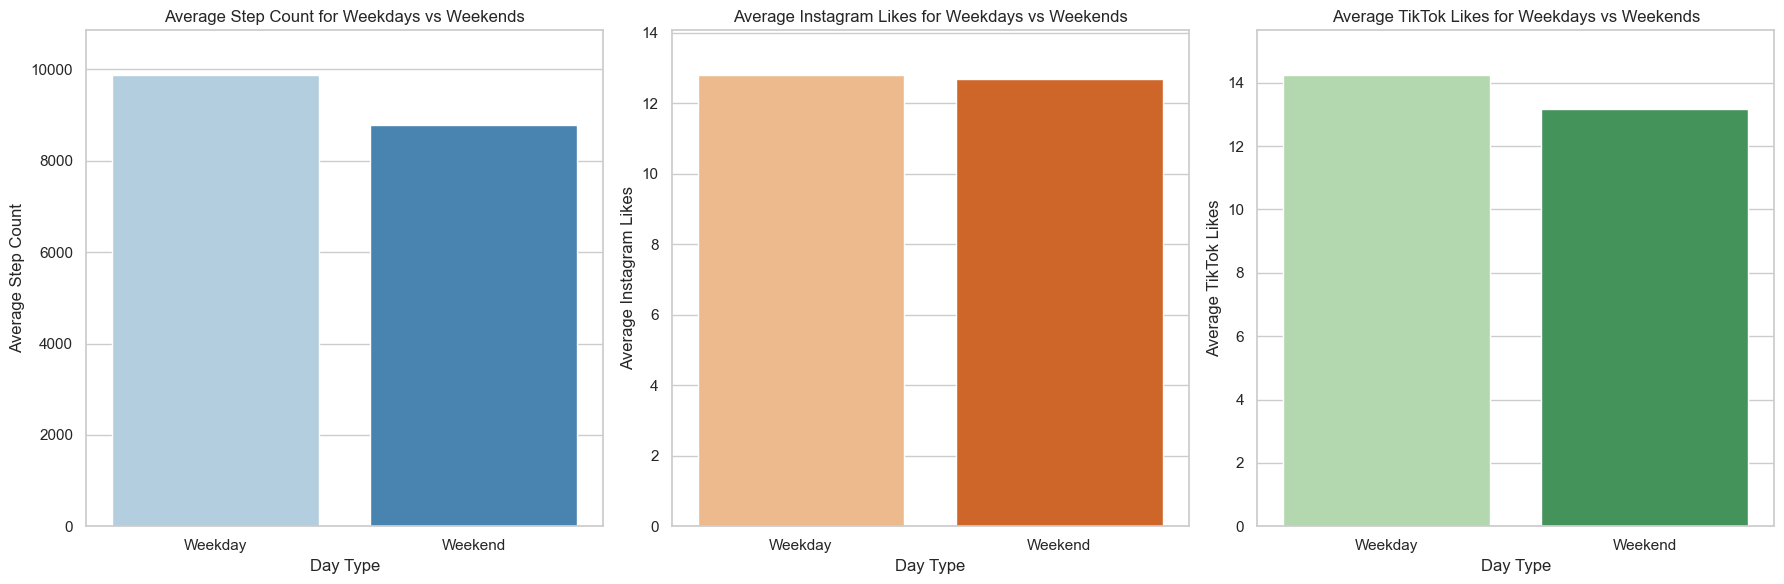

In [467]:
# Adding a buffer to y-limits for better visualization
step_y_max = step_avg['Average Step Count'].max() * 1.1  # Add 10% buffer
insta_y_max = insta_avg['Average Instagram Likes'].max() * 1.1
tiktok_y_max = tiktok_avg['Average TikTok Likes'].max() * 1.1

# Plotting the data
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Step Counts
sns.barplot(x='day_type', y='Average Step Count', data=step_avg, ax=axes[0], palette='Blues')
axes[0].set_title('Average Step Count for Weekdays vs Weekends')
axes[0].set_xlabel('Day Type')
axes[0].set_ylabel('Average Step Count')
axes[0].set_ylim(0, step_y_max)  # Adjust y-axis limit

# Instagram Likes
sns.barplot(x='day_type', y='Average Instagram Likes', data=insta_avg, ax=axes[1], palette='Oranges')
axes[1].set_title('Average Instagram Likes for Weekdays vs Weekends')
axes[1].set_xlabel('Day Type')
axes[1].set_ylabel('Average Instagram Likes')
axes[1].set_ylim(0, insta_y_max)  # Adjust y-axis limit

# TikTok Likes
sns.barplot(x='day_type', y='Average TikTok Likes', data=tiktok_avg, ax=axes[2], palette='Greens')
axes[2].set_title('Average TikTok Likes for Weekdays vs Weekends')
axes[2].set_xlabel('Day Type')
axes[2].set_ylabel('Average TikTok Likes')
axes[2].set_ylim(0, tiktok_y_max)  # Adjust y-axis limit

plt.tight_layout()
plt.show()


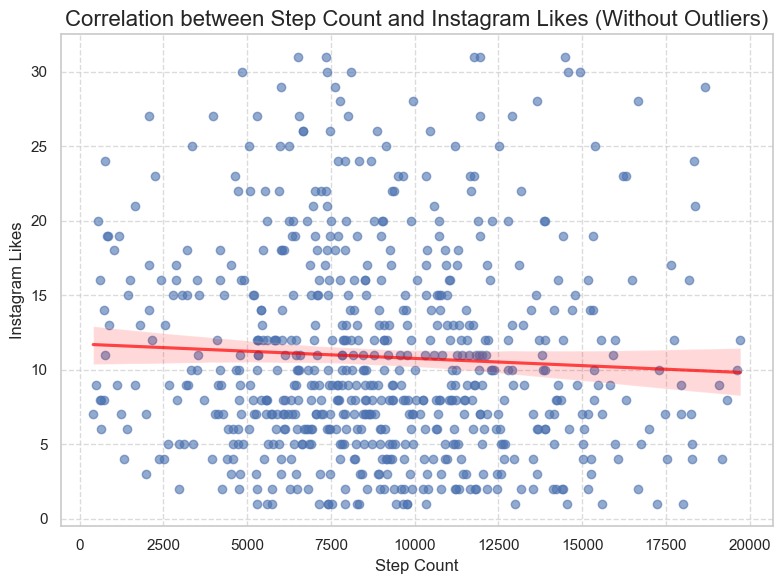

In [468]:
# Merge step counts and Instagram likes on the date
df_combined = pd.merge(
    df_filled[['date', 'step_count']],  # Step counts data
    df_summary[['date', 'total_likes']],  # Instagram likes data
    on='date',
    how='inner'
)

# Calculate the interquartile range (IQR) for step count and Instagram likes
Q1_step = df_combined['step_count'].quantile(0.25)
Q3_step = df_combined['step_count'].quantile(0.75)
IQR_step = Q3_step - Q1_step

Q1_likes = df_combined['total_likes'].quantile(0.25)
Q3_likes = df_combined['total_likes'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes

# Define thresholds for outliers
lower_bound_step = Q1_step - 1.5 * IQR_step
upper_bound_step = Q3_step + 1.5 * IQR_step

lower_bound_likes = Q1_likes - 1.5 * IQR_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes

# Filter the dataset to remove outliers
df_filtered_no_outliers = df_combined[
    (df_combined['step_count'] >= lower_bound_step) &
    (df_combined['step_count'] <= upper_bound_step) &
    (df_combined['total_likes'] >= lower_bound_likes) &
    (df_combined['total_likes'] <= upper_bound_likes)
]

# Plotting the scatter plot for correlation after removing outliers
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(
    x='step_count', 
    y='total_likes', 
    data=df_filtered_no_outliers, 
    scatter_kws={'alpha': 0.6}, 
    line_kws={'color': 'red', 'alpha': 0.7}
)

# Adding titles and labels
plt.title('Correlation between Step Count and Instagram Likes (Without Outliers)', fontsize=16)
plt.xlabel('Step Count', fontsize=12)
plt.ylabel('Instagram Likes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
